# Predict Bike-Sharing need in Metropolitan Area
Created By: __Rakesh Nain__

## Project Description
For the metropolitan area, one of the solution to traffic/environmental issues is
to enhance the current renting services for bicycles. The benefit of bike sharing
is that the sharing system allows people to rent a bike from one location and
return it to a different place on an as-needed basis. Sharing program is easier
to get access which is normally at a low cost or free of charges, the program is
often integrated with mobile devices making it easier to use.

In recent years, bike sharing has been well received all around the world, and
leads to significant impacts on establishing a larger cycling community, increasing the use of transportation, minimizing greenhouse gas emissions, enhancing public health and also traffic troubles. It is important to make sure that the
right amount of rental bikes are available and accessible at the right place and
at the right time, providing a city with a stable and sustainable supply of rental
bikes. In order to do so, one important task is to predict the hourly rental bike
demand as accurately as possible.

In this project, we are interested in exploring machine learning approaches to
predict the demands for bike sharing based on relevant data such as weather,
season, holiday, etc, which are known to influence the demands for bike renting.
The aim is to build statistical learning models that can predict how many bikes
are required in a particular area at a particular time, and identify the major
factors that affect the bike demand.

Specifically, this project is made to do these two things:
1. Accurately predict the bike sharing demands given the collected data?
2. Explain the prediction and its associated findings? For
    example, identifing the key factors that are strongly associated with the
    response variable, i.e., the demand.

### Environment and Libraries used
Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ggplot2
- reshape2
- car
- stats
- scales
- grid
- gridExtra
- RColorBrewer
- corrplot
- psych
- e1071
- caret
- gbm
- randomForest
- ranger
- glmnet
- elasticnet
- tictoc
- h2o

In [1]:
library(ggplot2)
library(reshape2)
library(car)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(corrplot)
library(psych)
library(e1071)
library(caret)
library(gbm)
library(randomForest)
library(ranger)
library(glmnet)
library(elasticnet)
library(tictoc)
library(h2o)
library(psych)
library(tidyverse)
library(lattice)
library(glmnet)
library(leaps)

Warning message:
"package 'reshape2' was built under R version 4.0.3"
Warning message:
"package 'car' was built under R version 4.0.3"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.0.3"
Warning message:
"package 'gridExtra' was built under R version 4.0.3"
Warning message:
"package 'corrplot' was built under R version 4.0.3"
corrplot 0.84 loaded


Attaching package: 'psych'


The following objects are masked from 'package:scales':

    alpha, rescale


The following object is masked from 'package:car':

    logit


The following objects are masked from 'package:ggplot2':

    %+%, alpha


Warning message:
"package 'e1071' was built under R version 4.0.3"
Warning message:
"package 'caret' was built under R version 4.0.3"
Loading required package: lattice

Warning message:
"package 'gbm' was built under R version 4.0.3"
Loaded gbm 2.1.8

Warning message:
"package 'randomForest' was built under R version 4.0.3"
randomForest 4.6-14

Type

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

### 2.1 Reading Dataset
- Read both training and testing data and combine them
- Print the number of data points and attributes

In [2]:
# read datasets
df_trn <- read.csv('train.csv')
df_tst <- read.csv('test.csv')
df <- rbind(df_trn, df_tst)
head(df)

# Display the dimensions
cat("The rented bike dataset for both training and testing has", dim(df)[1],
    "records, each with", dim(df)[2], "attributes.")

,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
2,15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
3,29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4,4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
5,15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
6,20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


The rented bike dataset for both training and testing has 8760 records, each with 14 attributes.

### 2.2 Extraction of Detailed Date
Firstly, extract `Year`, `Month`, `Day`, `Day.of.Week` and `Weekend` from `Date`. They are:
- `Year`: year of the data; factor of `2017` and `2018`
- `Month.Day`: a combination of month and day, factor of `month-day`
- `Month`: month of the data; factor of `01` to `12`
- `Day`: day of the data; factor of `01` to `31`
- `Day.of.Week`: day of week of the data; factor of `Monday` to `Sunday`
- `Weekend`: weekend of data; factor of `Yes` and `No`

In [3]:
# create columns
df$Date <- strptime(as.character(df$Date), "%d/%m/%y")
df$Day.of.Week <- weekdays(df$Date)
df$Weekend <- 'No'
df$Weekend[df$Day.of.Week == 'Saturday' | df$Day.of.Week == 'Sunday'] <- 'Yes'
df$Year  <- strftime(df$Date, format = "%Y")
df$Month <- strftime(df$Date, format = "%m")
df$Day   <- strftime(df$Date, format = "%d")
df$Date <- as.factor(df$Date)
df$Month.Day <- substring(df$Date, 6, 10)

# change data type
col_name <- c('Year', 'Month', 'Day', 'Day.of.Week', 'Weekend', 'Hour', 'Month.Day')
df[col_name] <- lapply(df[col_name], factor)

# change order of data
col_name <- c('Rented.Bike.Count',
              'Date', 'Year', 'Month.Day', 'Month', 'Day', 'Hour',
              'Seasons', 'Day.of.Week', 'Holiday', 'Weekend', 'Functioning.Day', 
              'Temperature', 'Dew.point.temperature', 'Humidity', 'Wind.speed',
              'Visibility', 'Solar.Radiation', 'Rainfall', 'Snowfall')
df <- df[,col_name]
df <- df[order(df[,'Date'], df[,'Hour']),]
rownames(df) <- NULL
head(df)

,Rented.Bike.Count,Date,Year,Month.Day,Month,Day,Hour,Seasons,Day.of.Week,Holiday,Weekend,Functioning.Day,Temperature,Dew.point.temperature,Humidity,Wind.speed,Visibility,Solar.Radiation,Rainfall,Snowfall
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<chr>,<fct>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,254,2017-12-01,2017,12-01,12,01,0,Winter,Friday,No Holiday,No,Yes,-5.2,-17.6,37,2.2,2000,0,0,0
2,204,2017-12-01,2017,12-01,12,01,1,Winter,Friday,No Holiday,No,Yes,-5.5,-17.6,38,0.8,2000,0,0,0
3,173,2017-12-01,2017,12-01,12,01,2,Winter,Friday,No Holiday,No,Yes,-6.0,-17.7,39,1.0,2000,0,0,0
4,107,2017-12-01,2017,12-01,12,01,3,Winter,Friday,No Holiday,No,Yes,-6.2,-17.6,40,0.9,2000,0,0,0
5,78,2017-12-01,2017,12-01,12,01,4,Winter,Friday,No Holiday,No,Yes,-6.0,-18.6,36,2.3,2000,0,0,0
6,100,2017-12-01,2017,12-01,12,01,5,Winter,Friday,No Holiday,No,Yes,-6.4,-18.7,37,1.5,2000,0,0,0


### 2.3 Summary of Attributes

In [4]:
# Display the dimensions
cat("After adding more columns, rented bike dataset for both training and testing has",
    dim(df)[1], "records, each with", dim(df)[2], "attributes. The structure is:\n\n")

# Display the structure
str(df)

cat("\nBasic statistics for each attribute are:")
# Statistical summary 
summary(df)

cat("The numbers of unique values for each attribute are:")
apply(df, 2, function(x) length(unique(x)))

After adding more columns, rented bike dataset for both training and testing has 8760 records, each with 20 attributes. The structure is:

'data.frame':	8760 obs. of  20 variables:
 $ Rented.Bike.Count    : int  254 204 173 107 78 100 181 460 930 490 ...
 $ Date                 : Factor w/ 365 levels "2017-12-01","2017-12-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                 : Factor w/ 2 levels "2017","2018": 1 1 1 1 1 1 1 1 1 1 ...
 $ Month.Day            : Factor w/ 365 levels "01-01","01-02",..: 335 335 335 335 335 335 335 335 335 335 ...
 $ Month                : Factor w/ 12 levels "01","02","03",..: 12 12 12 12 12 12 12 12 12 12 ...
 $ Day                  : Factor w/ 31 levels "01","02","03",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Hour                 : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Seasons              : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ Day.of.Week          : Factor w/ 7 levels "Friday","Monday",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Holid

 Rented.Bike.Count         Date        Year        Month.Day        Month     
 Min.   :   0.0    2017-12-01:  24   2017: 744   01-01  :  24   01     : 744  
 1st Qu.: 191.0    2017-12-02:  24   2018:8016   01-02  :  24   03     : 744  
 Median : 504.5    2017-12-03:  24               01-03  :  24   05     : 744  
 Mean   : 704.6    2017-12-04:  24               01-04  :  24   07     : 744  
 3rd Qu.:1065.2    2017-12-05:  24               01-05  :  24   08     : 744  
 Max.   :3556.0    2017-12-06:  24               01-06  :  24   10     : 744  
                   (Other)   :8616               (Other):8616   (Other):4296  
      Day            Hour        Seasons             Day.of.Week  
 01     : 288   0      : 365   Length:8760        Friday   :1272  
 02     : 288   1      : 365   Class :character   Monday   :1248  
 03     : 288   2      : 365   Mode  :character   Saturday :1248  
 04     : 288   3      : 365                      Sunday   :1248  
 05     : 288   4      : 365     

The numbers of unique values for each attribute are:

Rented.Bike.Count                  Date                  Year 
                 2166                   365                     2 
            Month.Day                 Month                   Day 
                  365                    12                    31 
                 Hour               Seasons           Day.of.Week 
                   24                     4                     7 
              Holiday               Weekend       Functioning.Day 
                    2                     2                     2 
          Temperature Dew.point.temperature              Humidity 
                  546                   556                    90 
           Wind.speed            Visibility       Solar.Radiation 
                   65                  1789                   345 
             Rainfall              Snowfall 
                   61                    51

The following table identifies which attributes are numerical and whether they are continuous or discrete, and which are categorical and whether they are nominal or ordinal. It includes some initial observations about the ranges and common values of the attributes.

|Attribute |Type |Sub-type |Comments |
|-|-|-|-|
|Rented.Bike.Count |numerical |Discrete |Target variable; dependent variable; value range between 0 and 3556; median, mean and Q3 are 504.5, 704.6 and 1065.2 whereas maximum is 3556, so there would be outliers at around maximum values|
|Date      |Categorical |Nominal |Combination of year, month and day; the total number is 365, same as the total number of day per year |
|Year      |Categorical |Ordinal |Year data; either 2017 or 2018 |
|Month.Day |Categorical |Nominal |Combination of month and day; the total number is 365, same as the total number of day per year |
|Month     |Categorical |Nominal |Month data; between 1 to 12 |
|Day       |Categorical |Nominal |Day data; between 1 to 31 |
|Hour      |Categorical |Ordinal |Hour data; between 0 to 23 |
|Seasons   |Categorical |Nominal |Seasonal data; there are 'Spring', 'Summer', 'Autumn', 'Winter' |
|Day.of.Week |Categorical |Nominal |Day of week data; there are 'Monday' to 'Sunday' |
|Holiday |Categorical |Nominal |Indicates whether it is holiday or not; either 'Holiday' or 'No Holiday' |
|Weekend |Categorical |Nominal |Indicates whether it is weekend or not; either 'Yes' or 'No' |
|Functioning.Day |Categorical |Nominal |Indicates whether the day is functioning day or not; either 'Yes' or 'No' |
|Temperature |numerical |Continuous |Temperature data; value range between -17.8 and 39.4 with 12.88 mean and 13.7 median |
|Dew.point.temperature |numerical |Continuous |Dewpoint temperature data; value range between -30.6 and 27.2 with 4.074 mean and 5.1 median. It is the temperature that air must be cooled for producing condensation (dew). It is a measure of how much moisture is in the air |
|Humidity |numerical |Continuous |Humidity data; value range between 0 and 98 with 58.23 mean and 57 median |
|Wind.speed |numerical |Continuous |Wind speed data; value range between 0 and 7.4 with 1.725 mean and 1.5 median; mostly around 1.5; outliers would be around maximum values |
|Visibility |numerical |Continuous |Visibility data; value range between 27 and 2000 with 1437 mean and 1698 median; mostly 2000 and this means the day is well visible; outliers would be around minimum values |
|Solar.Radiation |numerical |Continuous |Solar radiation data; value range between 0 and 3.52 with 0.5691 mean and 0.01 median; mostly around 0; outliers would be around maximum values |
|Rainfall |numerical |Continuous |Rainfall data; value range between 0 and 35 with 0.1487 mean and 0 median; mostly around 0; outliers would be around maximum values |
|Snowfall |numerical |Continuous |Snowfall data; value range between 0 and 8.8 with 0.07507 mean and 0 median; mostly around 0; outliers would be around maximum values |

## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

### 3.1 Simple Boxplot

No id variables; using all as measure variables



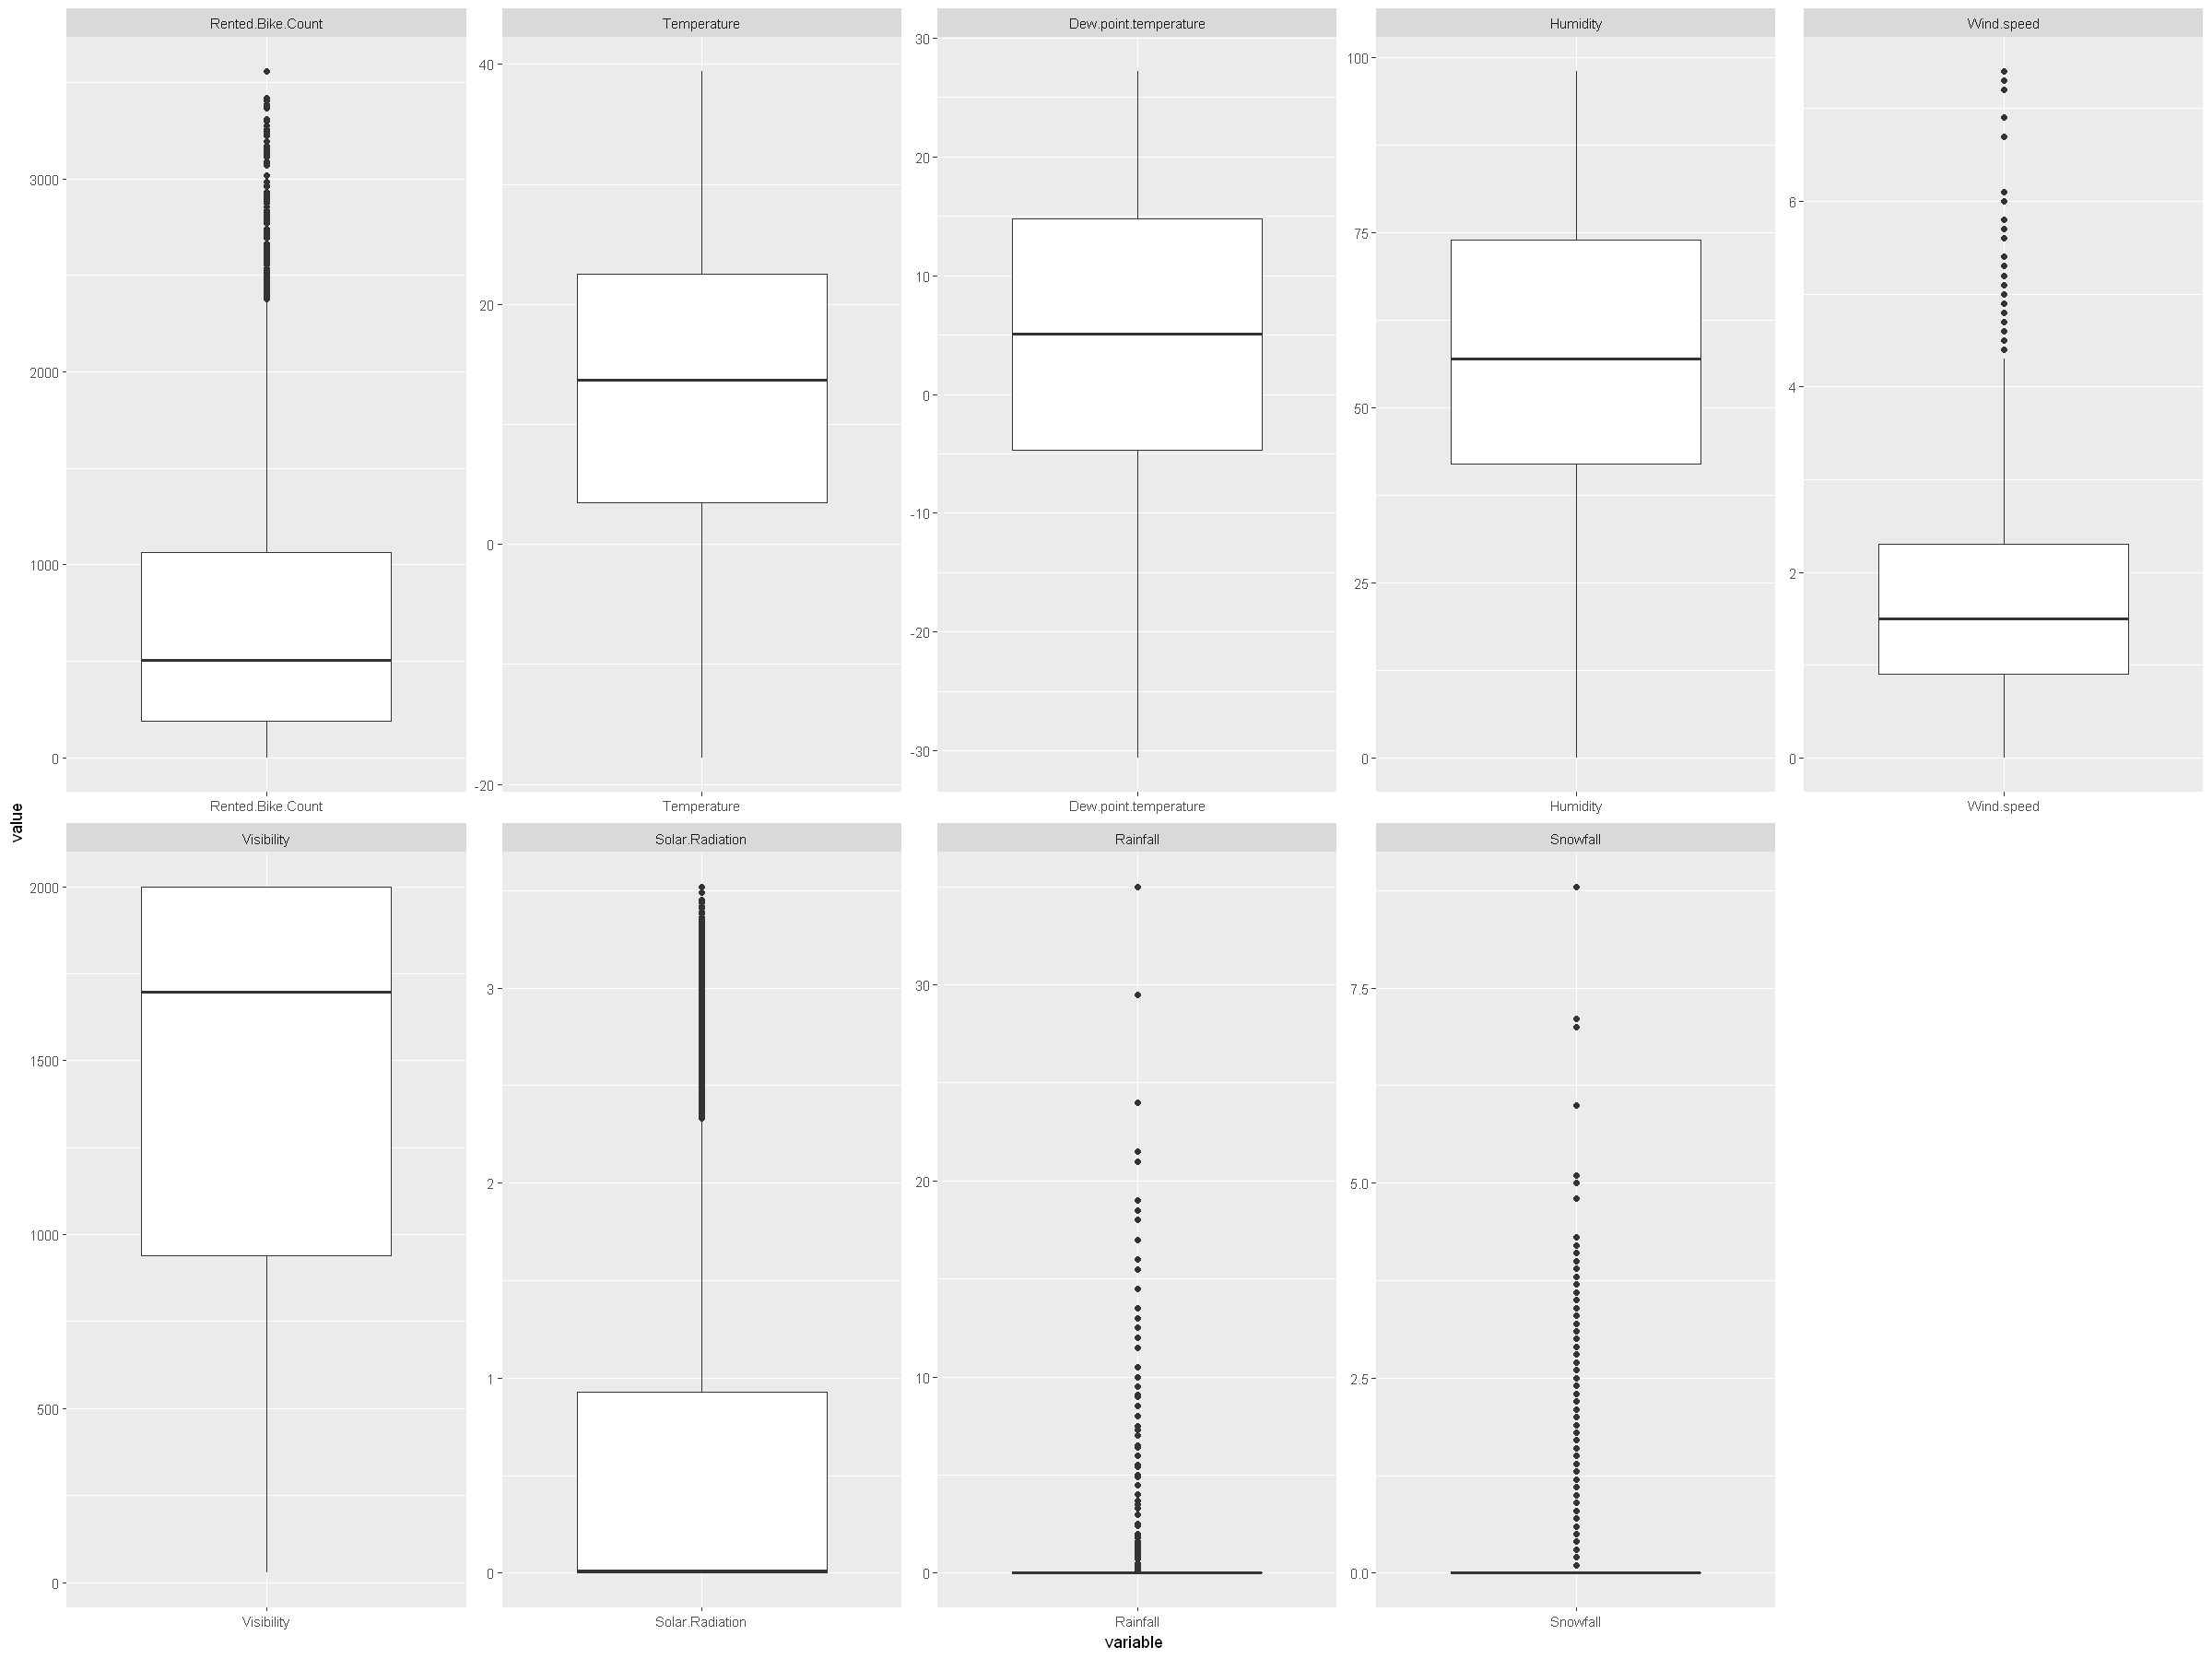

In [5]:
# Generate box plots of all variables except the two categorical/nomimal ones
options(repr.plot.width=20, repr.plot.height=15)
par(mfrow = c(2,5))
col_name <- c('Rented.Bike.Count', 'Temperature', 'Dew.point.temperature', 'Humidity',
              'Wind.speed', 'Visibility', 'Solar.Radiation', 'Rainfall', 'Snowfall')
m1 <- melt(as.data.frame(df[,col_name]))
ggplot(m1,aes(x = variable,y = value)) +
    facet_wrap(~variable, ncol=5, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

- `Rented.Bike.Count`, `Wind.speed` and `Solar.Radiation` have outliers at the maximum value, so they are expected to have positive skews
- `Rainfall` and `Snowfall` also have outliers at the maximum value, but more extreme, so they are expected to have large positive skews
- `Temperature`, `Dew.point.temperature` and `Humidity` have no outliers, and they seem to be normally distributed as the data points are distributed homogenously
- Unlike how it is expected in the previous Summary of Attributes, `Visibility` has no outliers, but it would still be negatively skewed inferrenced by looking at its median. This indicates that there are more number of data points with high visibility.

### 3.2 Simple Histogram

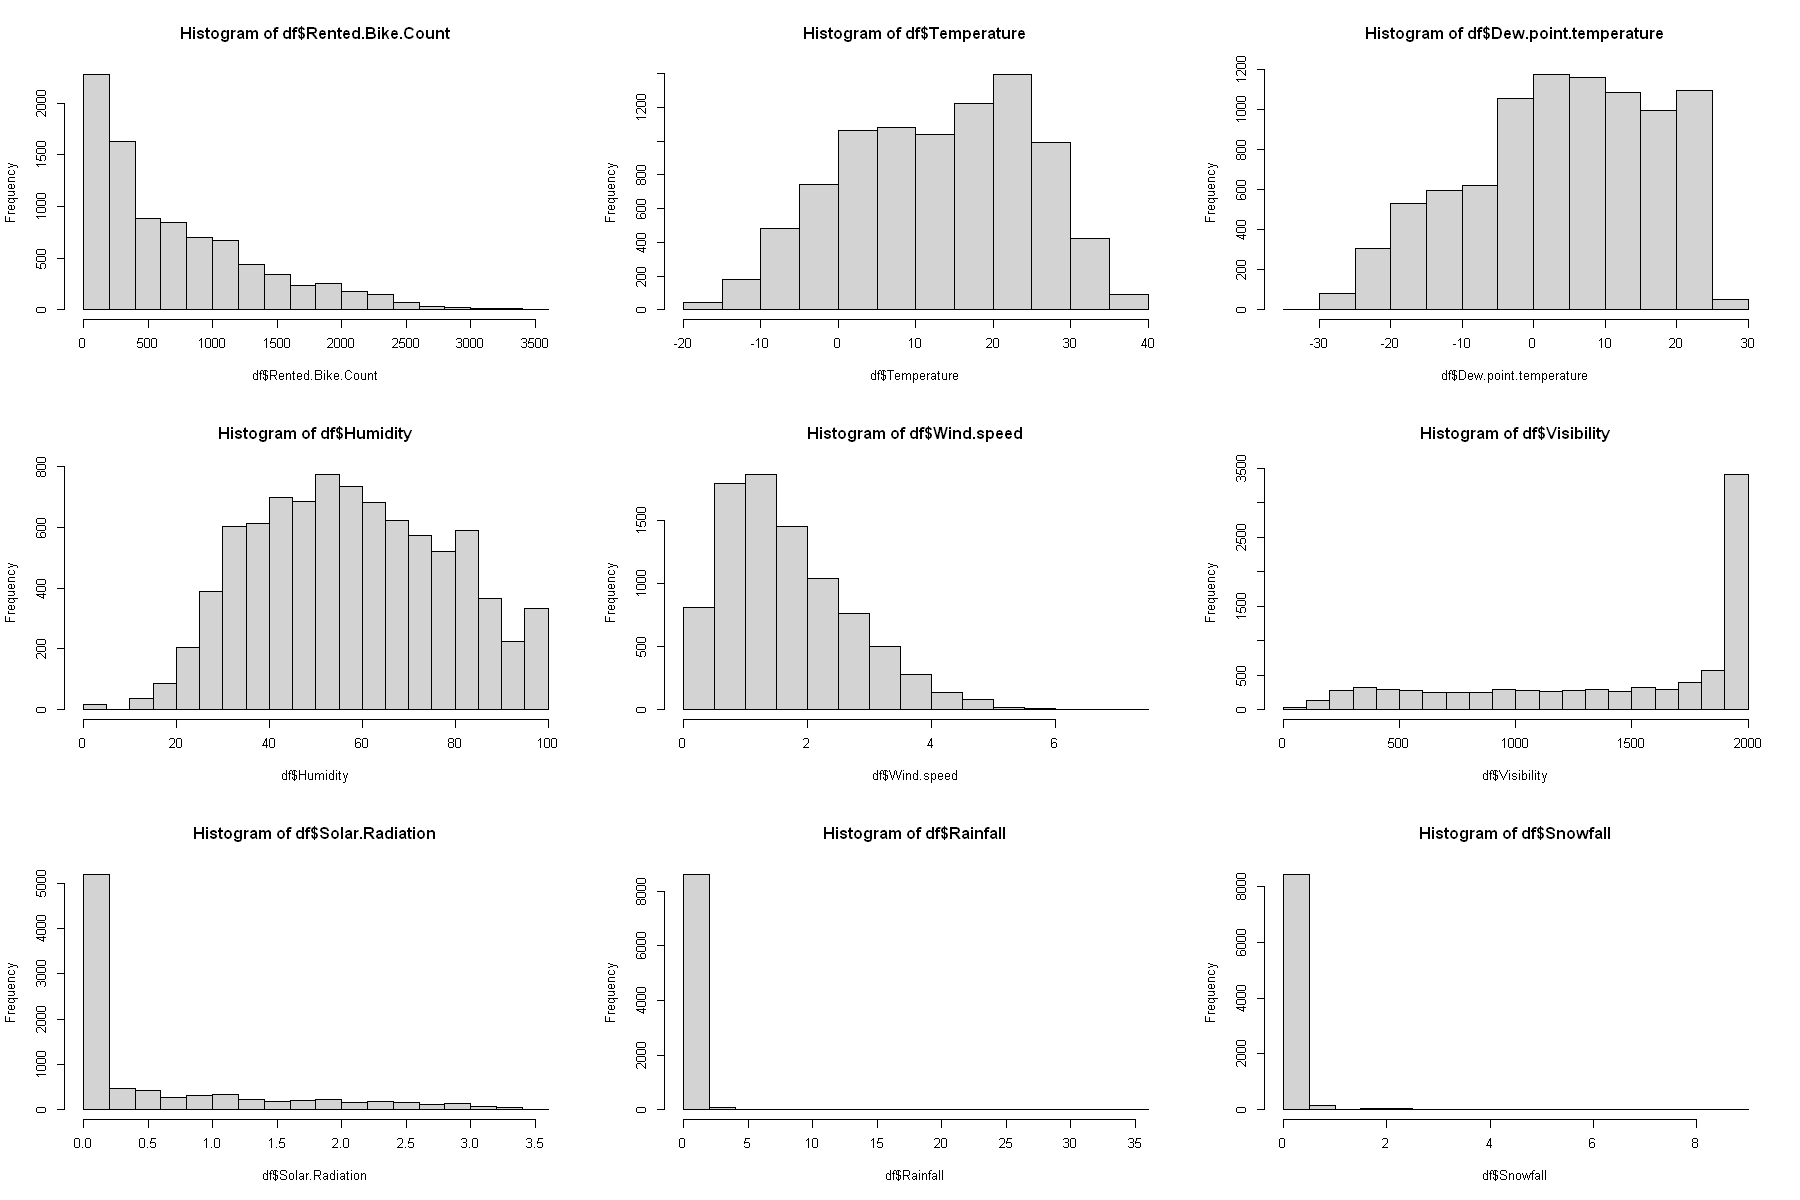

In [6]:
# Plot a histogram of each variable except the two categorical/nomimal ones
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow = c(3,3))
hist(df$Rented.Bike.Count)
hist(df$Temperature)
hist(df$Dew.point.temperature)
hist(df$Humidity)
hist(df$Wind.speed)
hist(df$Visibility)
hist(df$Solar.Radiation)
hist(df$Rainfall)
hist(df$Snowfall)

- `Rented.Bike.Count` and `Wind.speed` have positive skews
- Unlike how it is seen in the boxplot, `Solar.Radiation` has large positive skews
- `Rainfall` and `Snowfall` have large positive skews
- `Temperature` and `Humidity` are normally distributed
- Unlike how it is seen in the boxplot, `Dew.point.temperature` is slightly negatively skewed
- `Visibility` is largely negatively skewed

### 3.3 Transformed Histogram

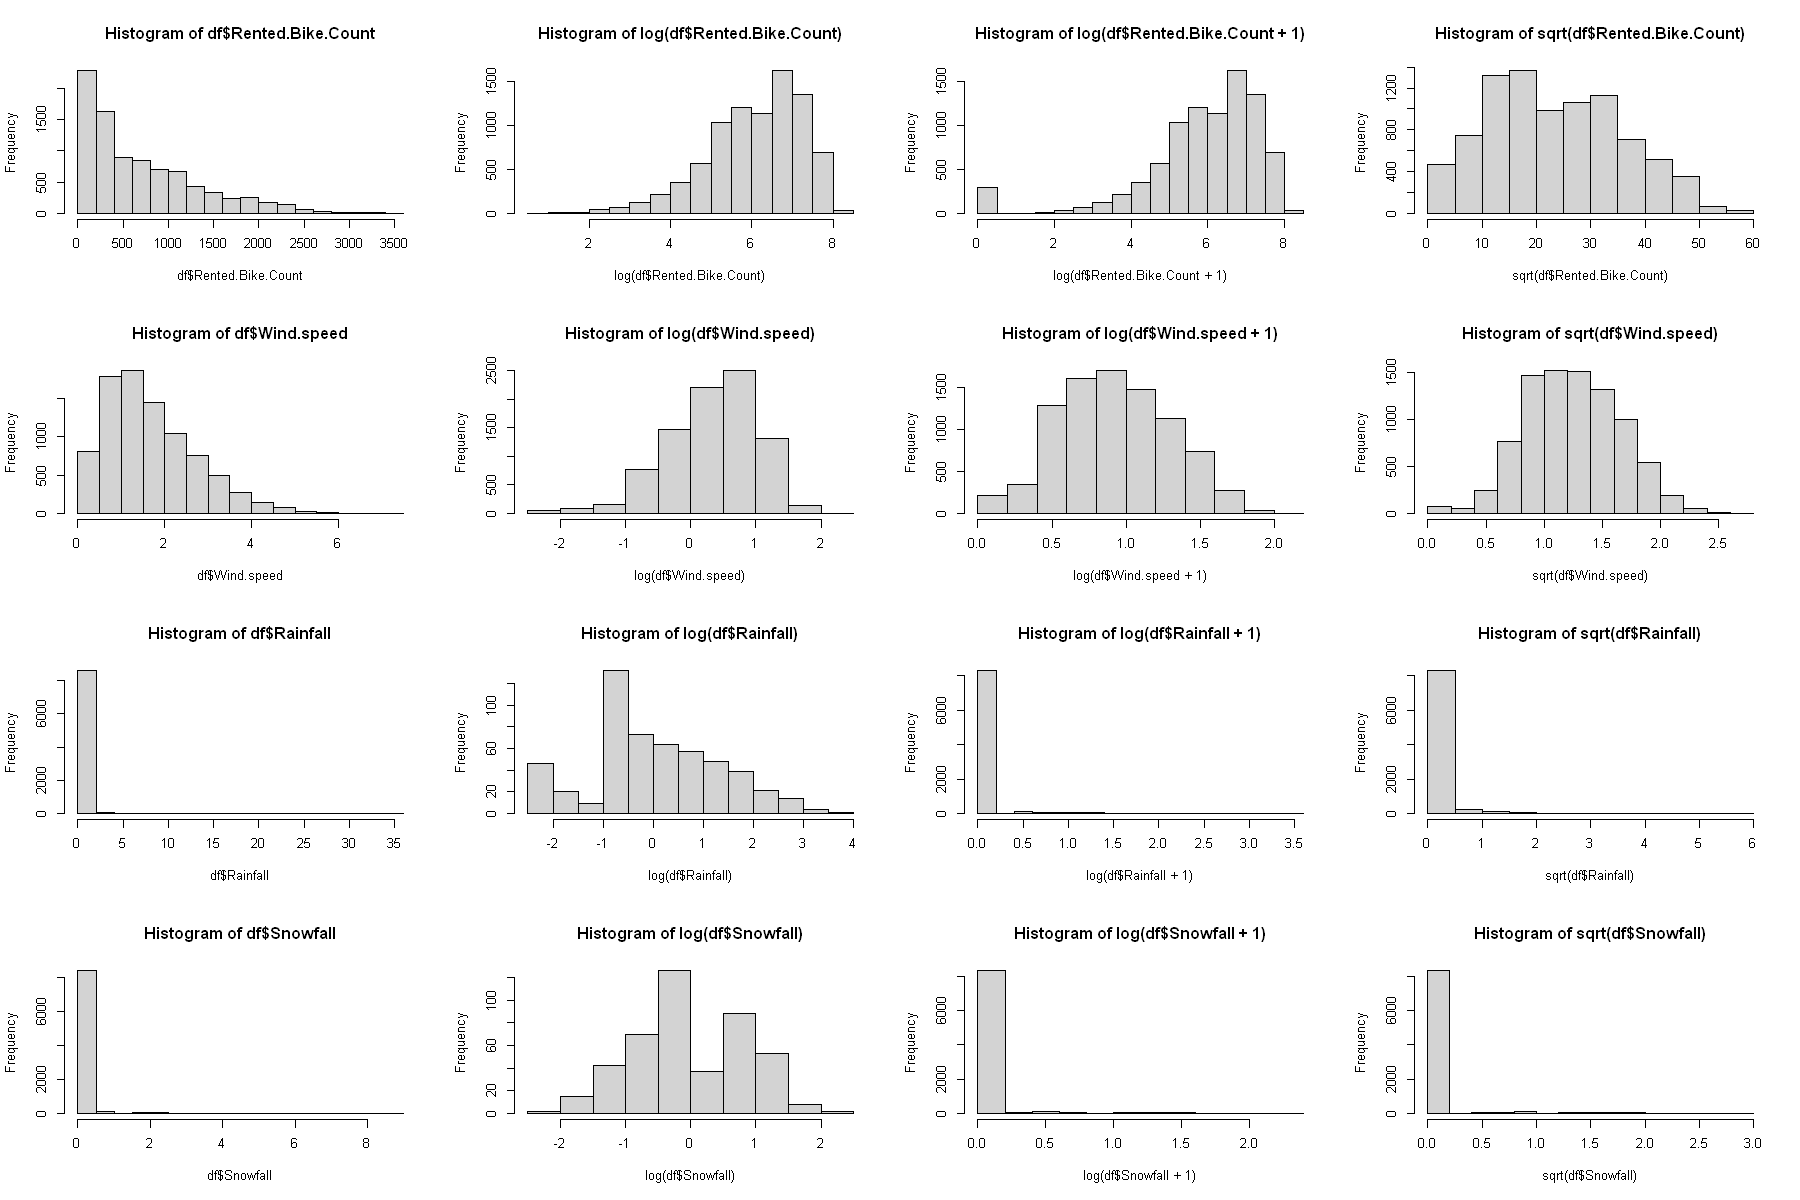

In [7]:
# Plot a histogram of each variable except the two categorical/nomimal ones
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow = c(4,4))

hist(df$Rented.Bike.Count)
hist(log(df$Rented.Bike.Count))
hist(log(df$Rented.Bike.Count+1))
hist(sqrt(df$Rented.Bike.Count))

hist(df$Wind.speed)
hist(log(df$Wind.speed))
hist(log(df$Wind.speed+1))
hist(sqrt(df$Wind.speed))

hist(df$Rainfall)
hist(log(df$Rainfall))
hist(log(df$Rainfall+1))
hist(sqrt(df$Rainfall))

hist(df$Snowfall)
hist(log(df$Snowfall))
hist(log(df$Snowfall+1))
hist(sqrt(df$Snowfall))

- `log10` appears to make the positively skewed data become negatively skewed for `Rented.Bike.Count` and `Wind.speed`. Where as `sqrt` is making `Rented.Bike.Count` and `Wind,speed` like normal distribution.
    - But for `Rented.Bike.Count` we can try `log101` and `sqrt` becuase `log10` is left skewed but still it is much better then original right skewed distribution and also I have a doubt on `sqrt` since distribution of `sqrt` is bi-modal type.
- Neither `log10` nor `sqrt` transformations are able to make `Rainfall` and `Snowfall` normally distributed.

Warning message in .Primitive("log")(x, ...):
"NaNs produced"
Warning message in .Primitive("log")(x, ...):
"NaNs produced"


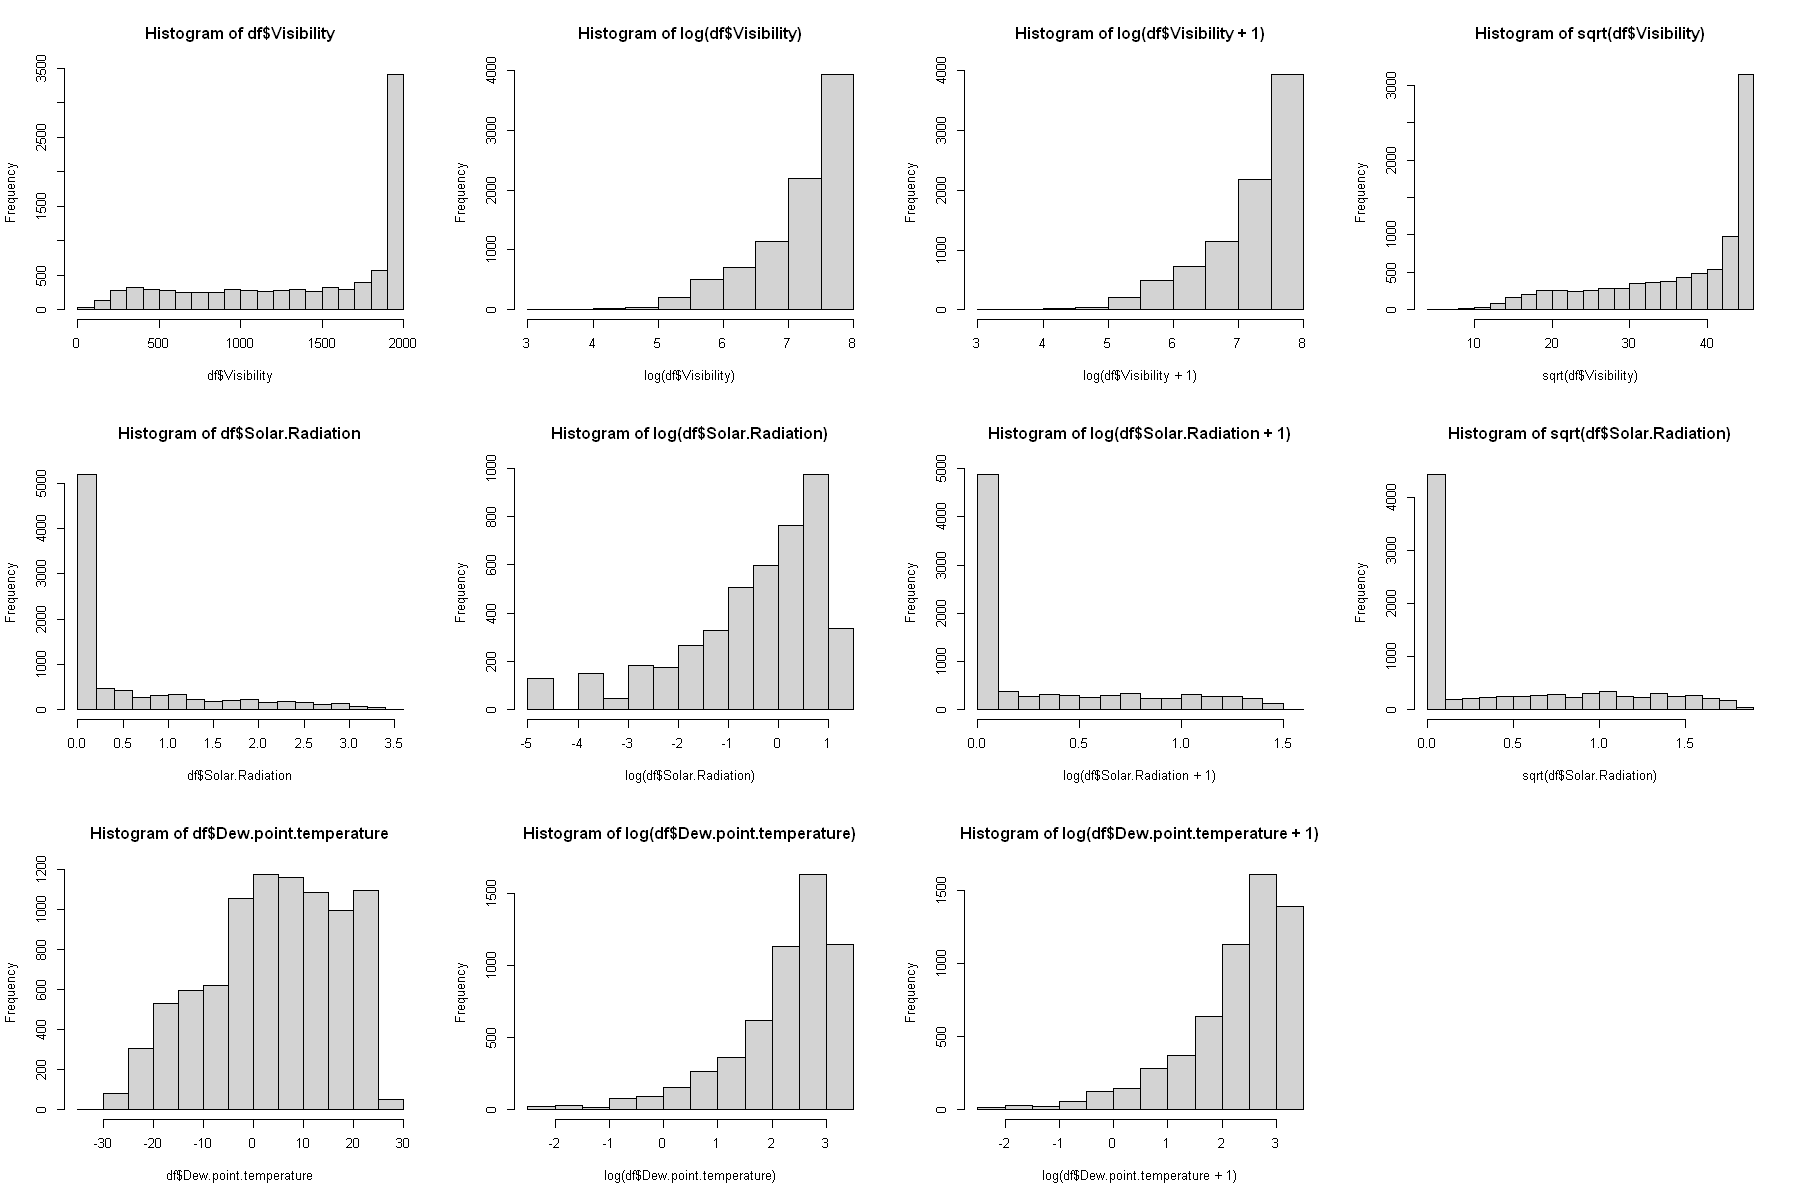

In [8]:
# Plot a histogram of each variable except the two categorical/nomimal ones
options(repr.plot.width=15, repr.plot.height=10)
par(mfrow = c(3,4))


hist(df$Visibility)
hist(log(df$Visibility))
hist(log(df$Visibility+1))
hist(sqrt(df$Visibility))

hist(df$Solar.Radiation)
hist(log(df$Solar.Radiation))
hist(log(df$Solar.Radiation+1))
hist(sqrt(df$Solar.Radiation))

hist(df$Dew.point.temperature)
hist(log(df$Dew.point.temperature))
hist(log(df$Dew.point.temperature+1))
# cannot use squareroot root in dew.point.temperature because it gave negative values
# hist(sqrt(df$Dew.point.temperature))

- `log10` transformation of `Visibility` is still left skewed but still little better then original distrbution of `Visibility` which was highly left skewed.
- `Solar.Radiation` cannot be negative so its imporvement by `log10` transformation is useless and `sqrt` transformation is not changing its right skewed distribution.
- `Dew.point.temperature` have negative values so we cannot use `sqrt` transformation and `log10` transformation is making distribution more left skewed.

### 3.4 Number of Data Points for Categorical Variable

In [9]:
cat('Seasons:\n')
for (val in unique(df[,'Seasons']))
{cat(val, 'has', nrow(df[df$Seasons == val,]), 'number of data points\n')}

cat('\nDay.of.Week:\n')
for (val in unique(df[,'Day.of.Week']))
{cat(val, 'has', nrow(df[df$Day.of.Week == val,]), 'number of data points\n')}

cat('\nHoliday:\n')
for (val in unique(df[,'Holiday']))
{cat(val, 'has', nrow(df[df$Holiday == val,]), 'number of data points\n')}

cat('\nFunctioning.Day:\n')
for (val in unique(df[,'Functioning.Day']))
{cat(val, 'has', nrow(df[df$Functioning.Day == val,]), 'number of data points\n')}

Seasons:
Winter has 2160 number of data points
Spring has 2208 number of data points
Summer has 2208 number of data points
Autumn has 2184 number of data points

Day.of.Week:
Friday has 1272 number of data points
Saturday has 1248 number of data points
Sunday has 1248 number of data points
Monday has 1248 number of data points
Tuesday has 1248 number of data points
Wednesday has 1248 number of data points
Thursday has 1248 number of data points

Holiday:
No Holiday has 8328 number of data points
Holiday has 432 number of data points

Functioning.Day:
Yes has 8465 number of data points
No has 295 number of data points


- As expected, each `Seasons` and `Day.of.Week` has similar number of data points
- There are much more `No Holiday` than `Holiday`, and `Yes` for `Functioning.Day` than `No`

### 3.5 Daily Rented Bike Count vs Daily Temperature

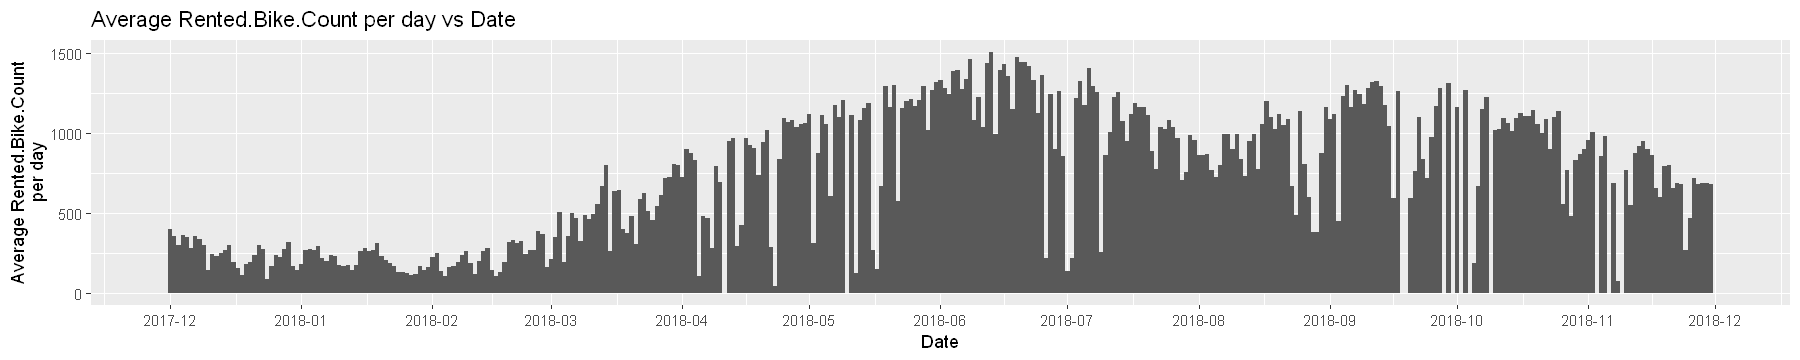

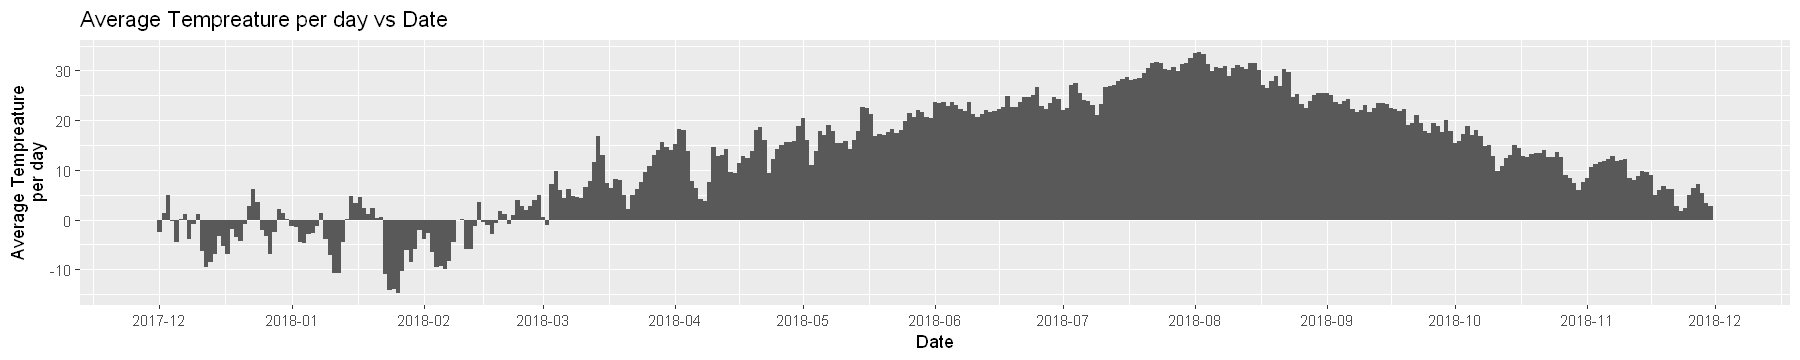

In [10]:
tmp <- aggregate(df$Rented.Bike.Count, by=list(df$Date), FUN=mean)
tmp$Date <- as.Date(tmp$Group.1)

options(repr.plot.width=15, repr.plot.height=3)
ggplot(tmp) +
    geom_histogram(aes(x=Date, weight=x), binwidth=1) +
    scale_x_date(labels = date_format("%Y-%m"), breaks='1 month') +
    ylab("Average Rented.Bike.Count\nper day") +
    ggtitle("Average Rented.Bike.Count per day vs Date")

tmp <- aggregate(df$Temperature, by=list(df$Date), FUN=mean)
tmp$Date <- as.Date(tmp$Group.1)

options(repr.plot.width=15, repr.plot.height=3)
ggplot(tmp) +
    geom_histogram(aes(x=Date, weight=x), binwidth=1) +
    scale_x_date(labels = date_format("%Y-%m"), breaks='1 month') +
    ylab("Average Tempreature\nper day") +
    ggtitle("Average Tempreature per day vs Date")

- Daily `Rented.Bike.Count` is small when the daily `Tempreature` is around 0 Celcius, but it increases as daily `Tempreature` increases
- Around the peak daily `Tempreature`, which is `2018-08`, daily `Rented.Bike.Count` drops and rise back
- After that, it decreases along with daily `Tempreature`
- This means that daily `Rented.Bike.Count` decreases when the weather is either too cold (winter) or hot (summer)
- Hence, they appear to have non-linear relationship

### 3.6 Daily Dew Point Temperature vs Daily Tempreature vs Daily Solar Radiation vs Rainfall

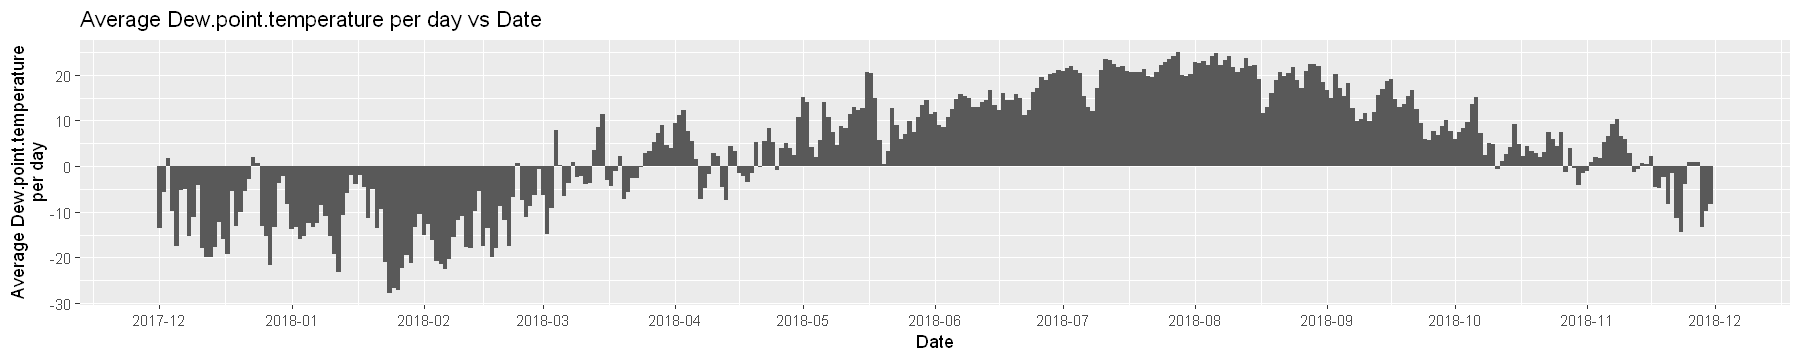

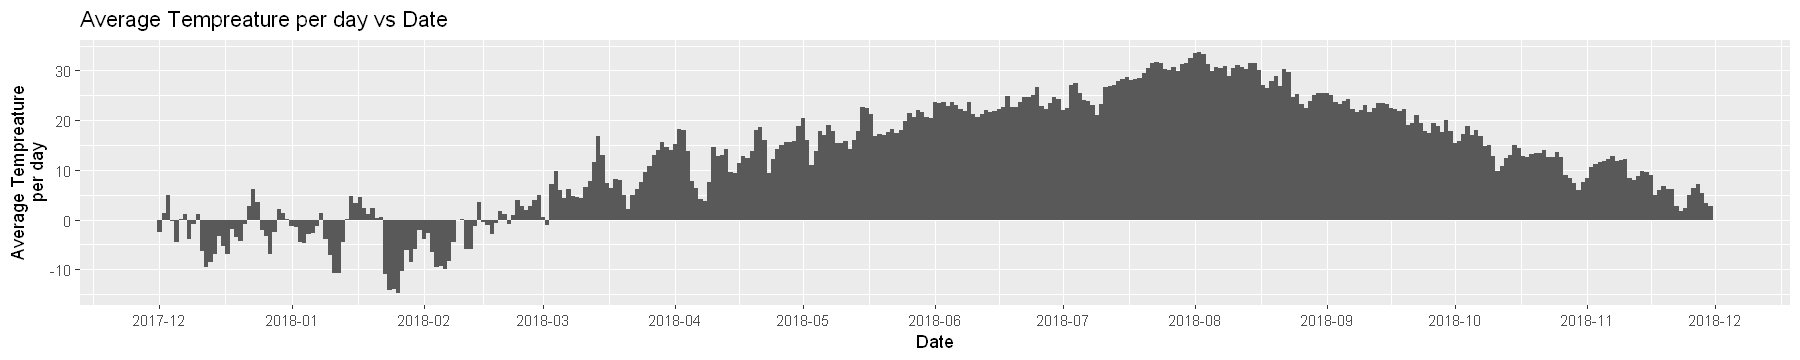

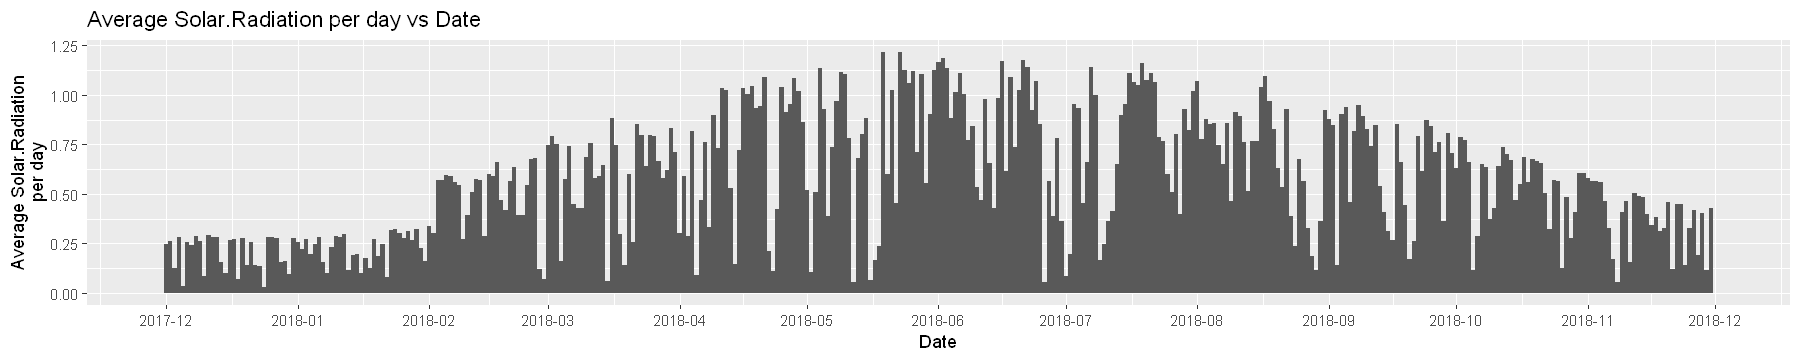

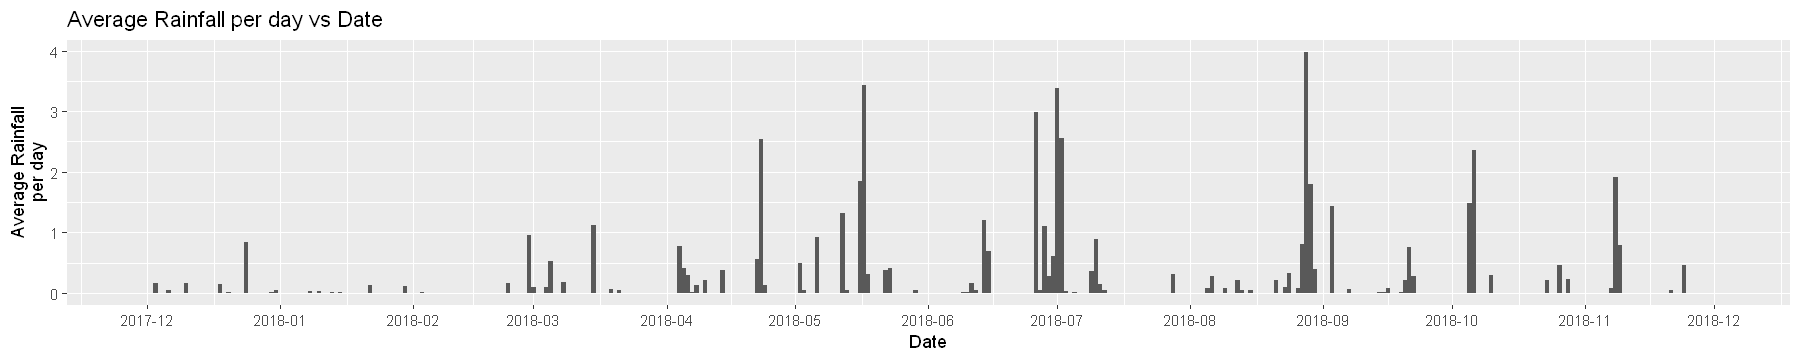

In [11]:
tmp <- aggregate(df$Dew.point.temperature, by=list(df$Date), FUN=mean)
tmp$Date <- as.Date(tmp$Group.1)

options(repr.plot.width=15, repr.plot.height=3)
ggplot(tmp) +
    geom_histogram(aes(x=Date, weight=x), binwidth=1) +
    scale_x_date(labels = date_format("%Y-%m"), breaks='1 month') +
    ylab("Average Dew.point.temperature\nper day") +
    ggtitle("Average Dew.point.temperature per day vs Date")

tmp <- aggregate(df$Temperature, by=list(df$Date), FUN=mean)
tmp$Date <- as.Date(tmp$Group.1)

options(repr.plot.width=15, repr.plot.height=3)
ggplot(tmp) +
    geom_histogram(aes(x=Date, weight=x), binwidth=1) +
    scale_x_date(labels = date_format("%Y-%m"), breaks='1 month') +
    ylab("Average Tempreature\nper day") +
    ggtitle("Average Tempreature per day vs Date")

tmp <- aggregate(df$Solar.Radiation, by=list(df$Date), FUN=mean)
tmp$Date <- as.Date(tmp$Group.1)

options(repr.plot.width=15, repr.plot.height=3)
ggplot(tmp) +
    geom_histogram(aes(x=Date, weight=x), binwidth=1) +
    scale_x_date(labels = date_format("%Y-%m"), breaks='1 month') +
    ylab("Average Solar.Radiation\nper day") +
    ggtitle("Average Solar.Radiation per day vs Date")

tmp <- aggregate(df$Rainfall, by=list(df$Date), FUN=mean)
tmp$Date <- as.Date(tmp$Group.1)

options(repr.plot.width=15, repr.plot.height=3)
ggplot(tmp) +
    geom_histogram(aes(x=Date, weight=x), binwidth=1) +
    scale_x_date(labels = date_format("%Y-%m"), breaks='1 month') +
    ylab("Average Rainfall\nper day") +
    ggtitle("Average Rainfall per day vs Date")

- Daily `Dew.point.temperature` seems highly related to the daily `Temperature`, where it is usually 5 to 10 Celcius lower than daily `Temperature`, so they would have high correlation
- Both daily `Dew.point.temperature` and daily `Temperature` are peak on `2018-08` and during the winter, they reach minimum
- Daily `Solar.Radiation` seems highly related to daily `Temperature`, but it seems like it is shifted from daily `Temperature`
- Daily `Solar.Radiation` starts to increase from `2018-02` whereas daily `Temperature` starts to increase from `2018-03`
- The peak of daily `Solar.Radiation` seems to be `2018-06` whereas daily `Temperature` is `2018-08`
- If you look closely, daily `Solar.Radiation` is also highly related to the daily `Rainfall`
- Those days with high daily `Rainfall` decreases daily `Solar.Radiation`, especially between mid May and September
- However, daily `Rainfall` decreases daily `Solar.Radiation`, but it is not the only reason for a decrease in daily `Solar.Radiation`, so correlation between them would not be high

### 3.7 Correlations

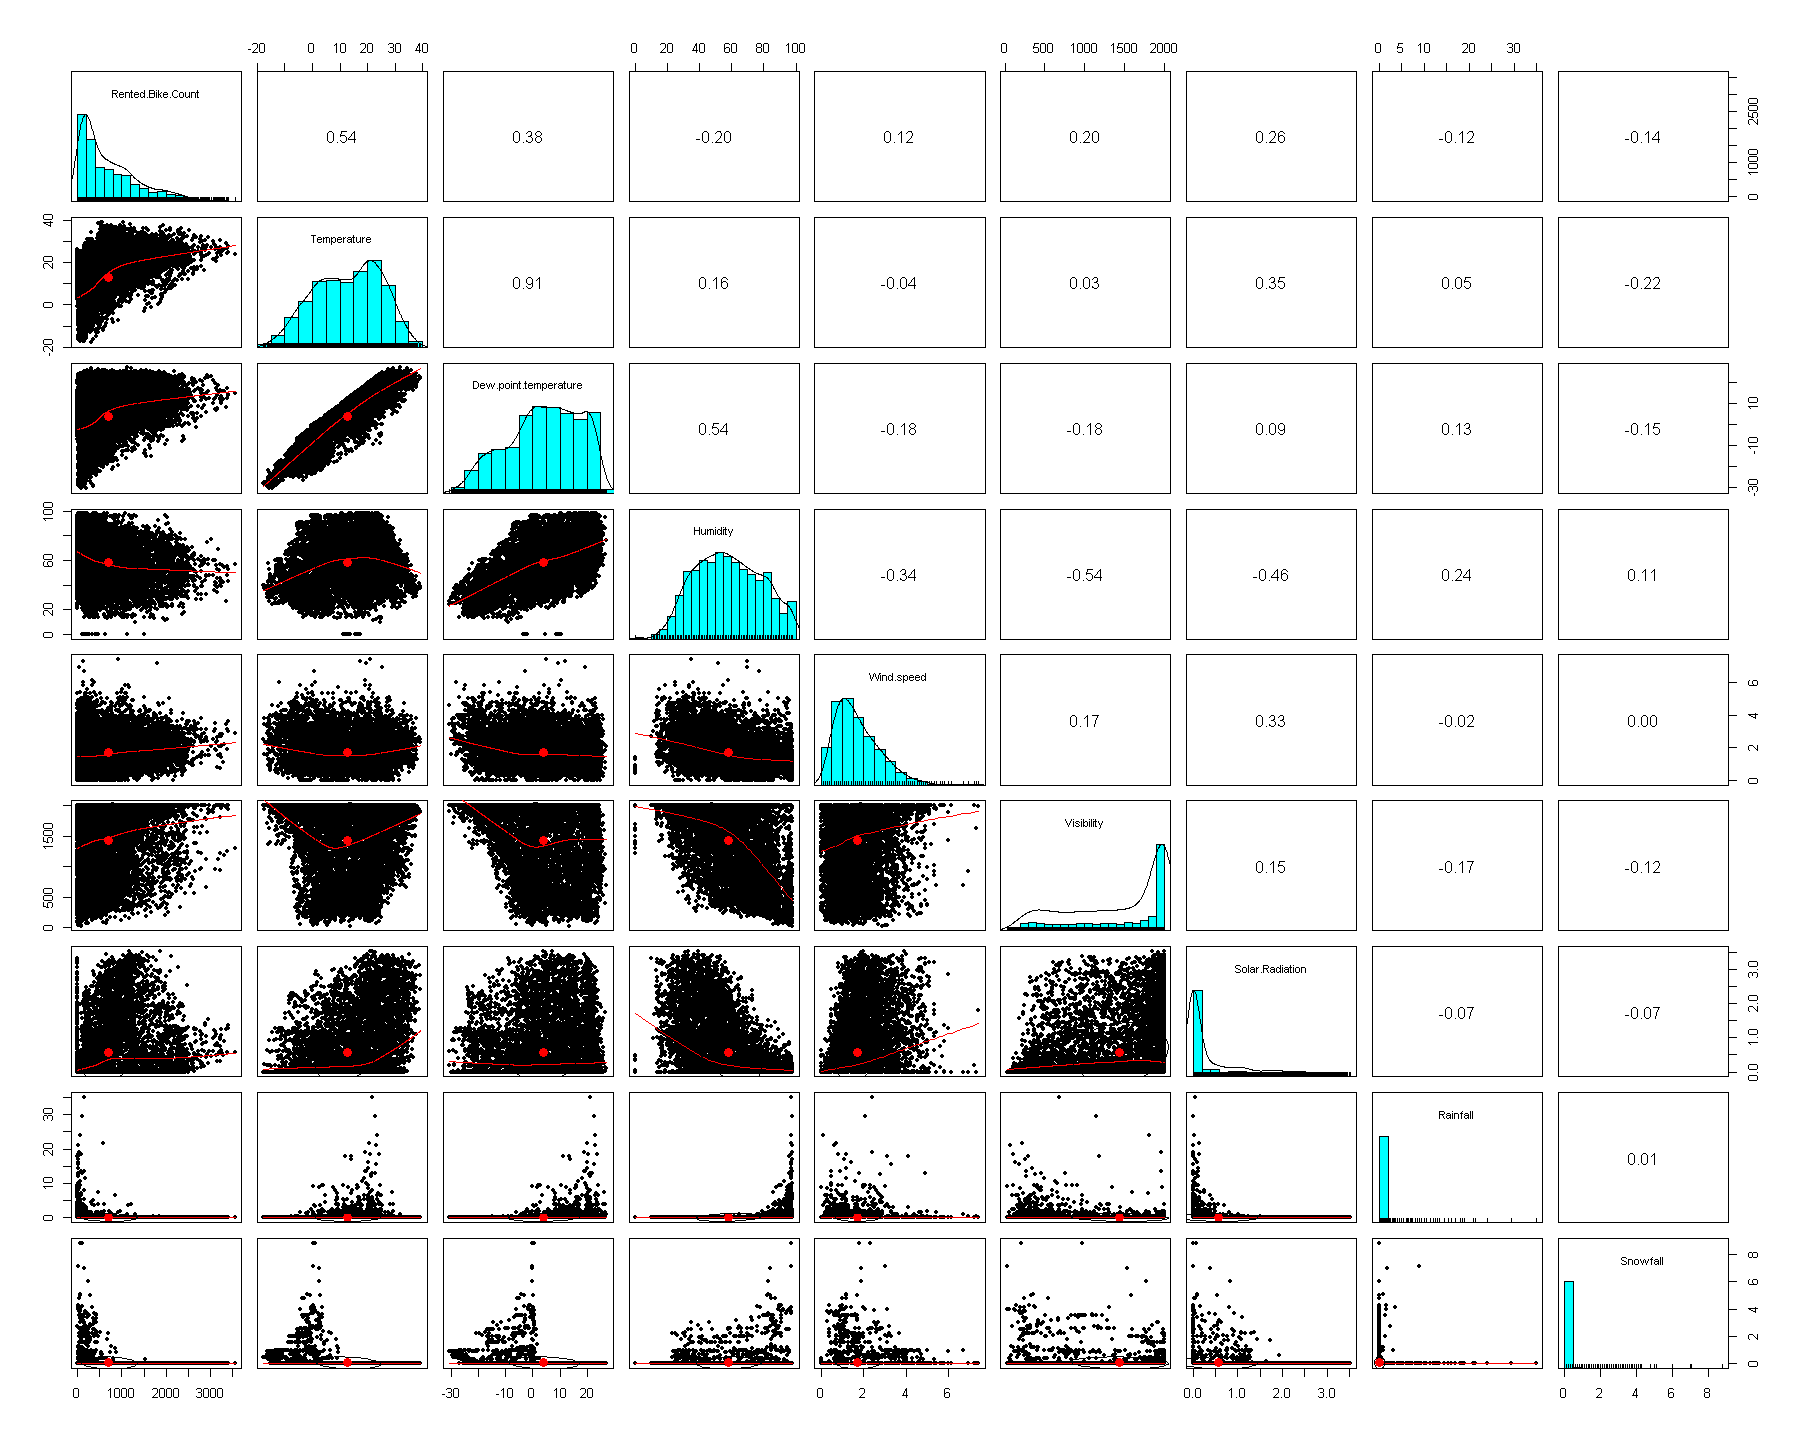

In [12]:
categorical <- c('Date', 'Year', 'Month.Day', 'Month', 'Day', 'Hour', 'Seasons',
                 'Day.of.Week', 'Holiday', 'Weekend', 'Functioning.Day')
options(repr.plot.width=15, repr.plot.height=12)
# pairs.panels(df[sample.int(nrow(df),1000),!names(df) %in% categorical])
pairs.panels(df[,!names(df) %in% categorical])

- All the variables seem to be correlated with `Rented.Bike.Count`, but `Temperature` seems to be the most correlated variable
- `Humidity`, `Rainfall` and `Snowfall` are negatively correlated with `Rented.Bike.Count` while other variables are positively correlated wit`Rented.Bike.Count`
- `Wind.speed`, `Rainfall` and `Snowfall` have smaller correlations than others with `Rented.Bike.Count`.
- `Dew.point.temperature` has very high correlation with `Temperature`, 0.91, and with `Humidity`, 0.54
- This makes sense as `Dew.point.temperature` indicates how much moisture is in the air
- `Temperature` is also negatively correlated to `Snowfall` as 1) `Snowfall` occurs only during winter and 2) when `Snowfall` occurs, it will generally get colder
- Both `Dew.point.temperature` and `Humidity` are negatively correlated to `Wind.speed` and `Visibility` as lesser the wind or visibility, we can say the air is generally more moisture, such as fog
- `Humidity` is also negatively correlated to `Solar.Radiation` and positively correlated to `Rainfall` since they determine `Humidity` in general
- Interestingly, `Wind.speed` is positively correlated to `Visibility` and `Solar.Radiation`. This might be because it is negatively correlated to the variables that are negatively correlated to `Visibility` and `Solar.Radiation`, such as `Humidity`

### 3.8 Boxplot by Hour

Using Date, Year, Month.Day, Month, Day, Hour, Seasons, Day.of.Week, Holiday, Weekend, Functioning.Day as id variables



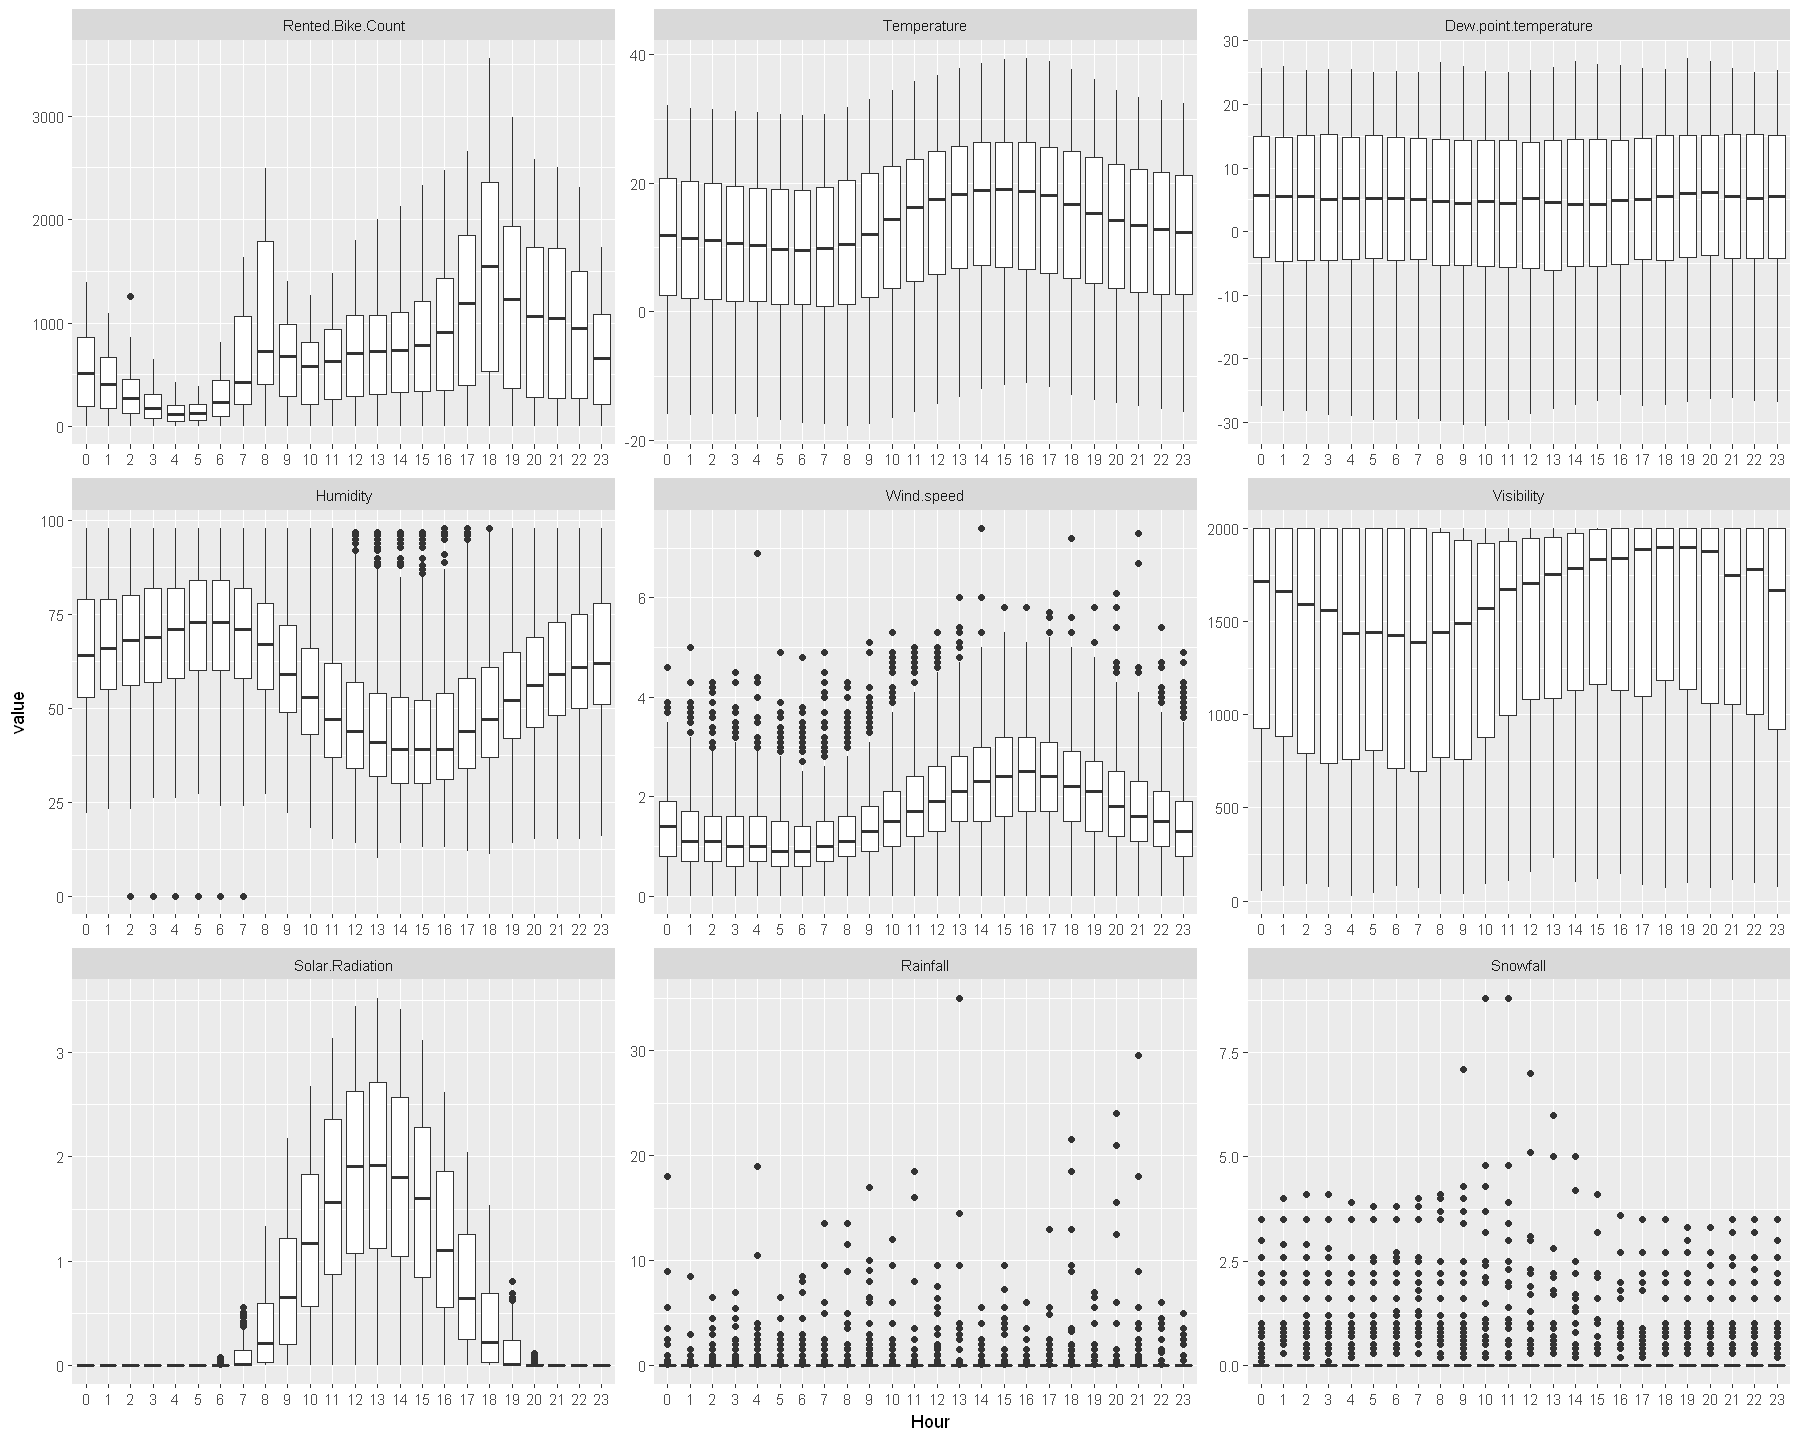

In [13]:
col_name <- c()
tmp <- melt(as.data.frame(df[,!names(df) %in% col_name]))

ggplot(tmp, aes(x=Hour,y=value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

- Between morning until afternoon, `Tempreature`, `Wind.speed`, `Solar.Radiation` increase whereas `Humidity` decreases
- Between afternoon until night, `Tempreature`, `Wind.speed`, `Solar.Radiation` decrease whereas `Humidity` increases
- The behaviour of `Tempreature`, `Solar.Radiation` and `Humidity` is obvious as that is when the sun is up
- Interestingly, `Wind.speed` fluxtuates during the day time
- `Visibility` decreases midnight and morning and increases until afternoon
- `Rainfall`, `Snowfall`, `Dew.point.tempreature` seem to have no correlationship between hour of the day
- Interestingly, `Dew.point.tempreature` seems it does not follow `Tempreature` when compared per `Hour`, but if you look at the correlationship table, they are highly correlated. This is going to be discussed at later section

### 3.9 Boxplot by Day of Week

Using Date, Year, Month.Day, Month, Day, Hour, Seasons, Day.of.Week, Holiday, Weekend, Functioning.Day as id variables



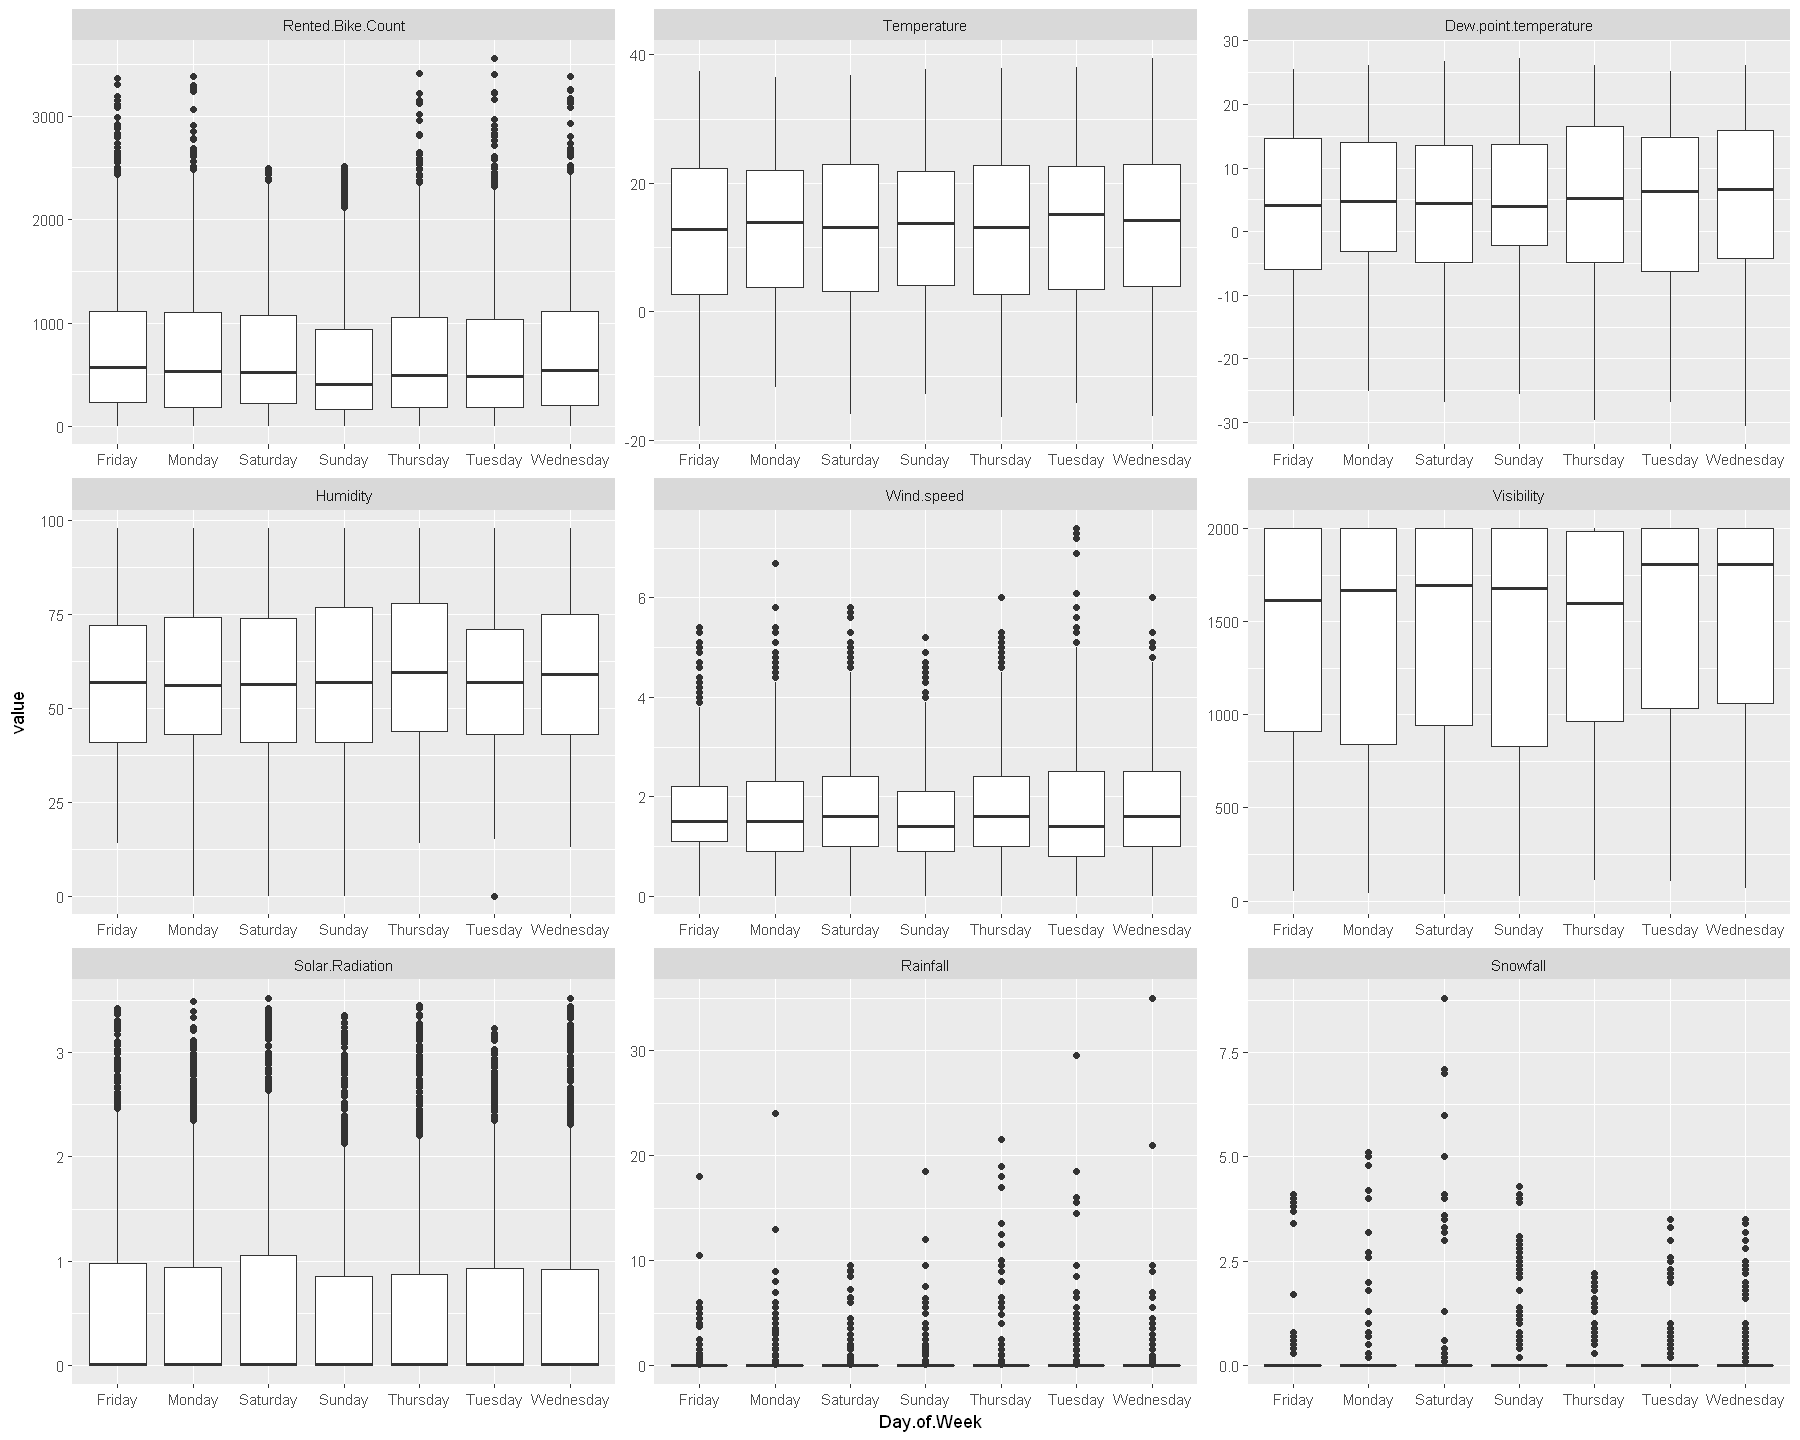

In [14]:
col_name <- c()
tmp <- melt(as.data.frame(df[,!names(df) %in% col_name]))

ggplot(tmp, aes(x=Day.of.Week,y=value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

- As assumed, `Temperature`, `Dew.point.temperature`, `Humidity`, `Wind.speed`, `Visibility`, `Solar.Radiation`, `Rainfall`, `Snowfall` do not have any relationship with `Day.of.Week`
- `Rented.Bike.Count` for Saturday and Sunday seems to have less outliers than other days. This can be seen as weekends and weekdays. This is going to be discussed at later section

### 3.10 Boxplot by Month

Using Date, Year, Month.Day, Month, Day, Hour, Seasons, Day.of.Week, Holiday, Weekend, Functioning.Day as id variables



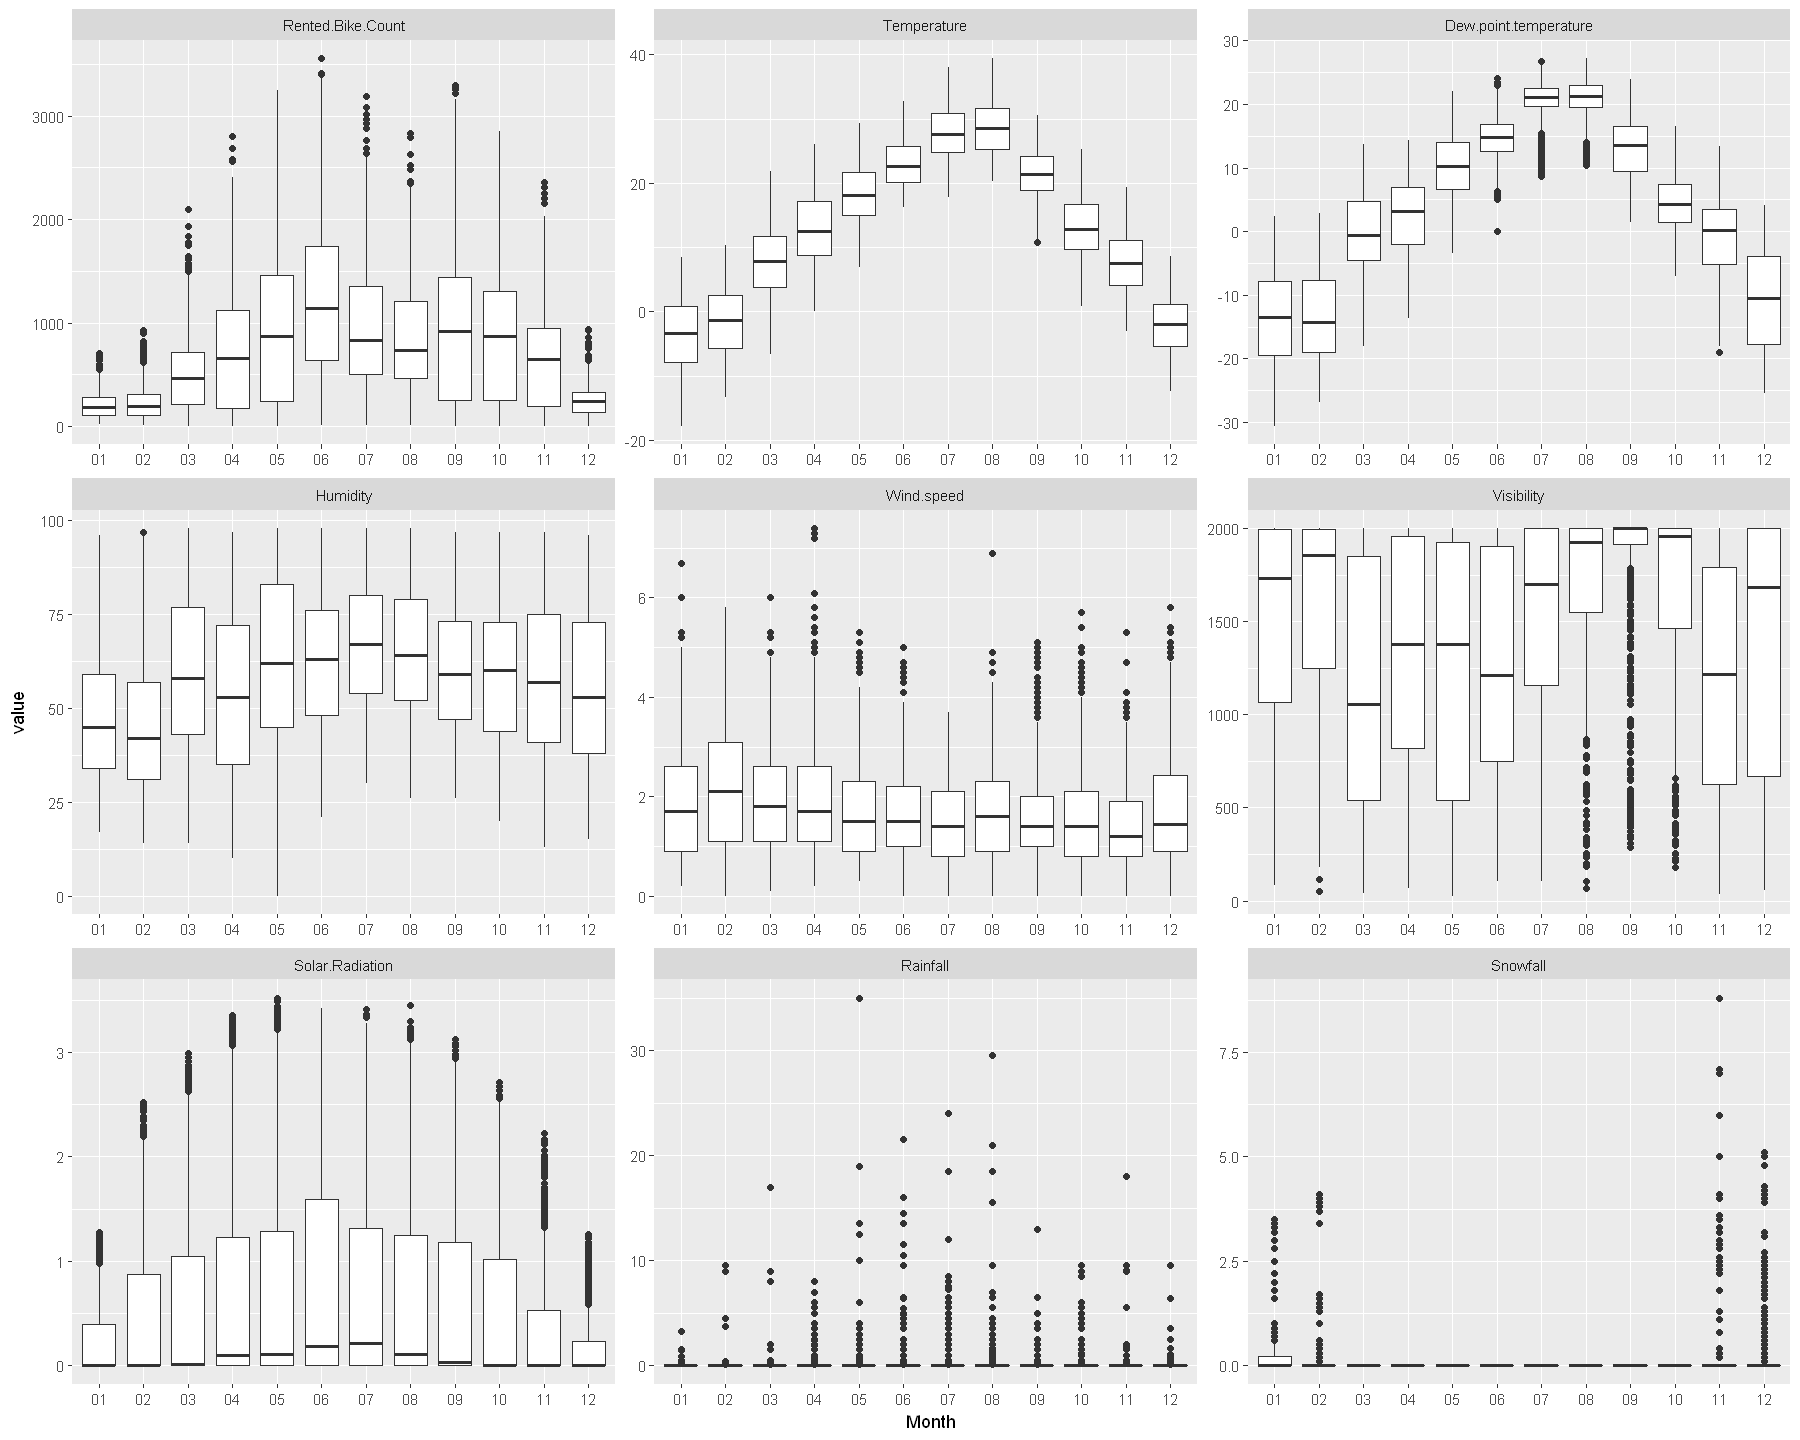

In [15]:
col_name <- c()
tmp <- melt(as.data.frame(df[,!names(df) %in% col_name]))

ggplot(tmp, aes(x=Month,y=value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

- As seen in `Average Rented.Bike.Count per day vs Date` above, `Rented.Bike.Count` decreases a lot between 12 to 2 `Month` (winter) and between 7 to 8 `Month` (late summer). This is going to be discussed at later section
- As expected, `Temperature`, `Dew.point.temperature` and `Humidity`are maximum between 7 to 8 `Month` (late summer) and minimum between 12 to 2 `Month` (winter). This is going to be discussed at later section
- Interestingly, `Wind.speed` seems constant across different months
- A lot of `Visibility` appears to be maximum between 8 to 10 (late summer to early autumn)
- As assumed, `Solar.Radiation` is maximum when summer and minimum when winter
- `Rainfall` seems to be arbitrary, but lesser between 11 to 2 (late autumn to winter), and this is when `Snowfall` appears

### 3.11 Boxplot by Functioning Day

Only 0 "Rented.Bike.Count" exists if "Functioning.Day" is "No"

Using Date, Year, Month.Day, Month, Day, Hour, Seasons, Day.of.Week, Holiday, Weekend, Functioning.Day as id variables



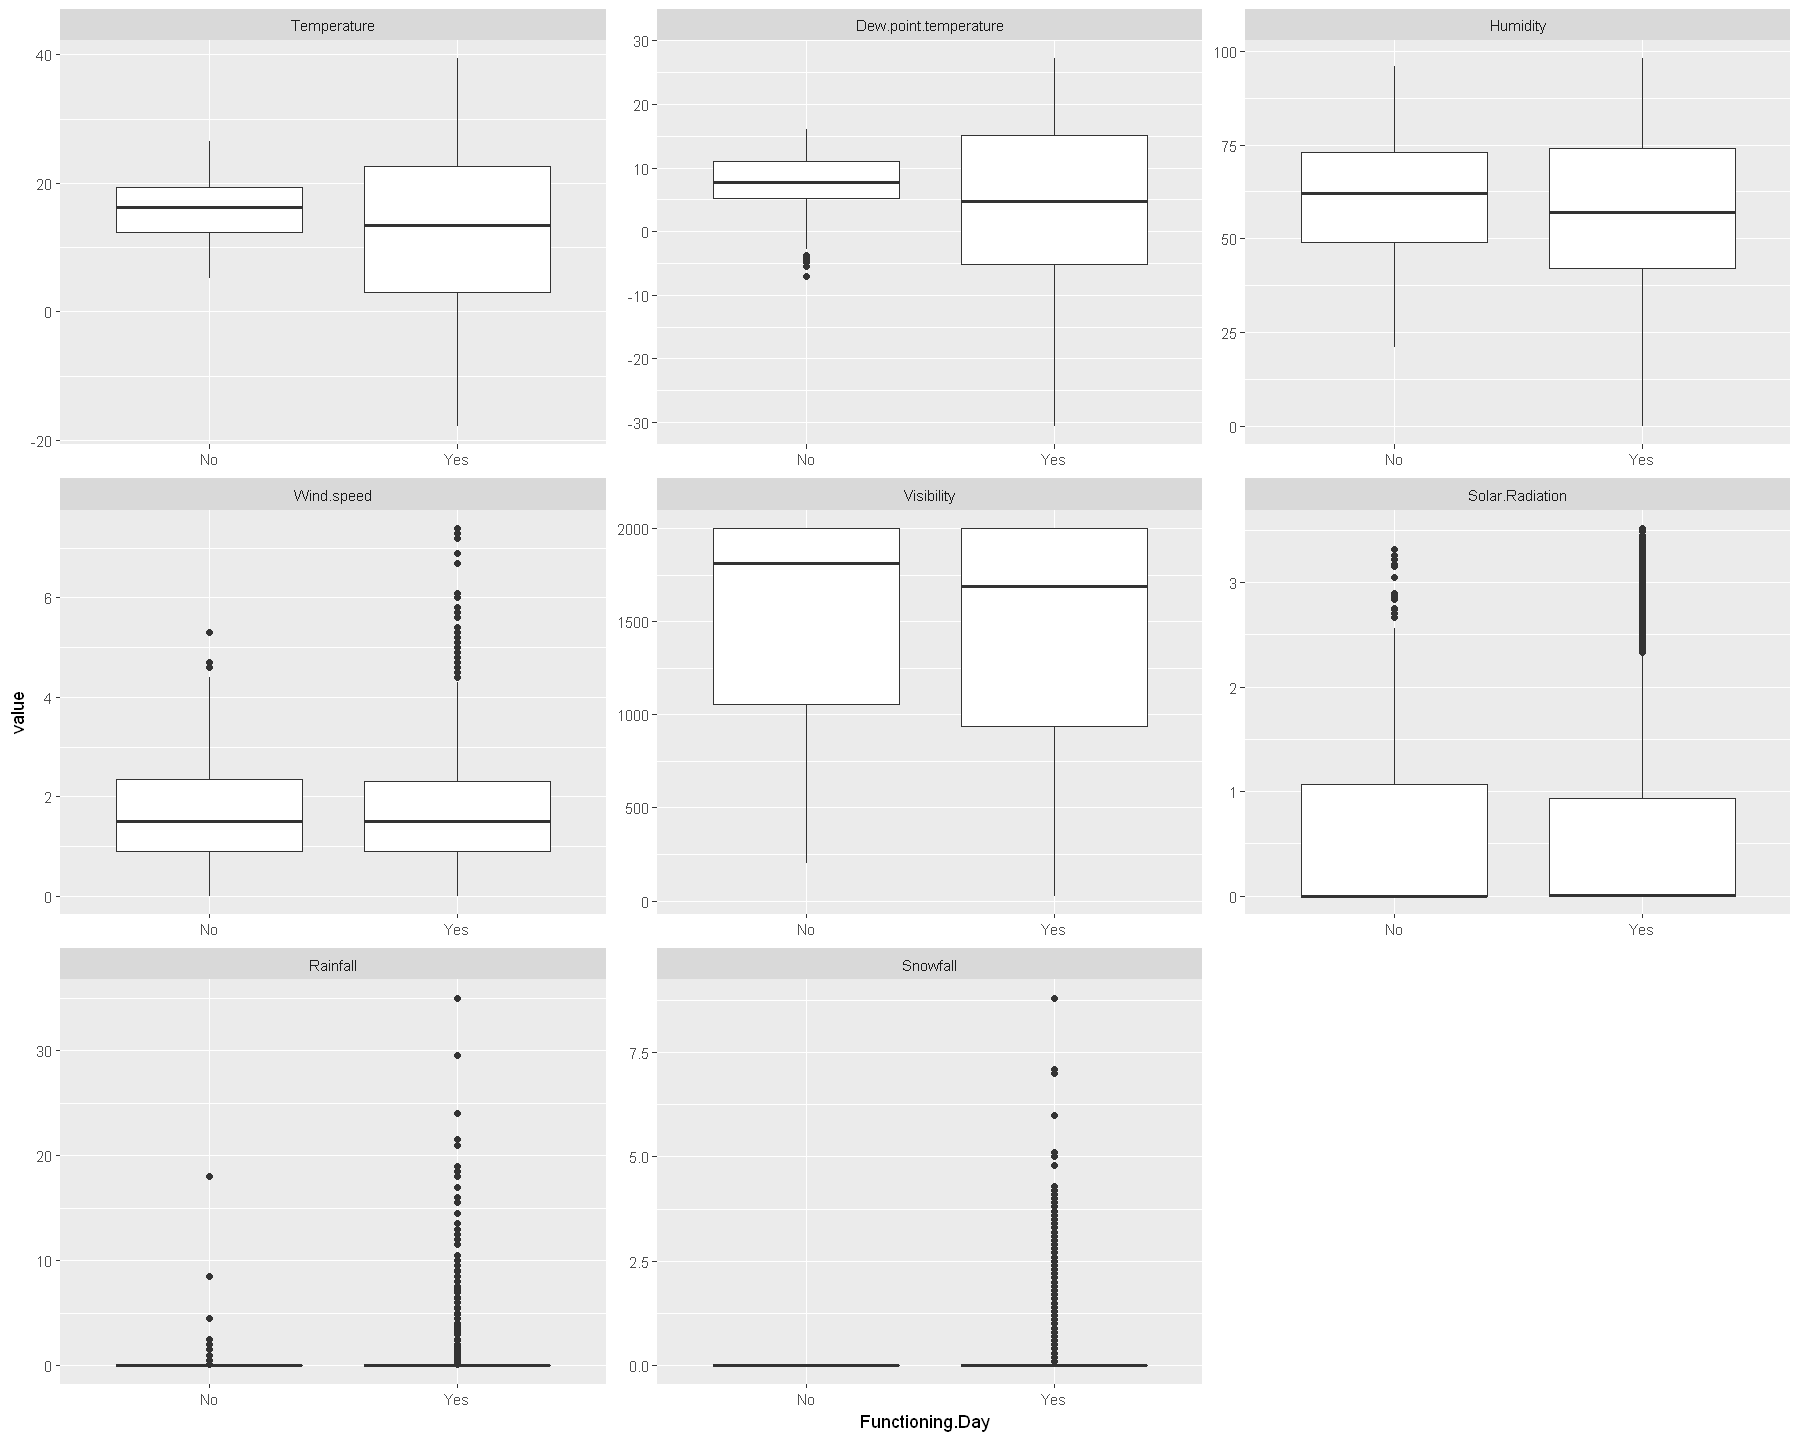

In [16]:
cat('Only', unique(df_trn[df_trn$Functioning.Day == 'No', 'Rented.Bike.Count']),
    '"Rented.Bike.Count" exists if "Functioning.Day" is "No"')

col_name <- c('Rented.Bike.Count')
tmp <- melt(as.data.frame(df[,!names(df) %in% col_name]))
options(repr.plot.width=15, repr.plot.height=12)

ggplot(tmp, aes(x=Functioning.Day,y=value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

- Only 0 `Rented.Bike.Count` exists if `Functioning.Day` is `No`
- `Wind.speed`, `Rainfall`, `Snowfall` seem to have more upper outliers for `Yes` of `Functioning.Day`, but it should be opposite because it makes more sense to have rougher weather for `No` of `Functioning.Day`
- Hence, there seems to be no pattern between `Yes` and `No` in `Functioning.Day`

### 3.12 Boxplot by Holiday

Holiday: Holiday 
2017-12-22	2017-12-24	2017-12-25	2017-12-31	2018-01-01	2018-02-15	2018-02-16	2018-02-17	2018-03-01	2018-05-01	2018-05-22	2018-06-06	2018-08-15	2018-09-23	2018-09-24	2018-09-25	2018-10-03	2018-10-09 



Using Date, Year, Month.Day, Month, Day, Hour, Seasons, Day.of.Week, Holiday, Weekend, Functioning.Day as id variables



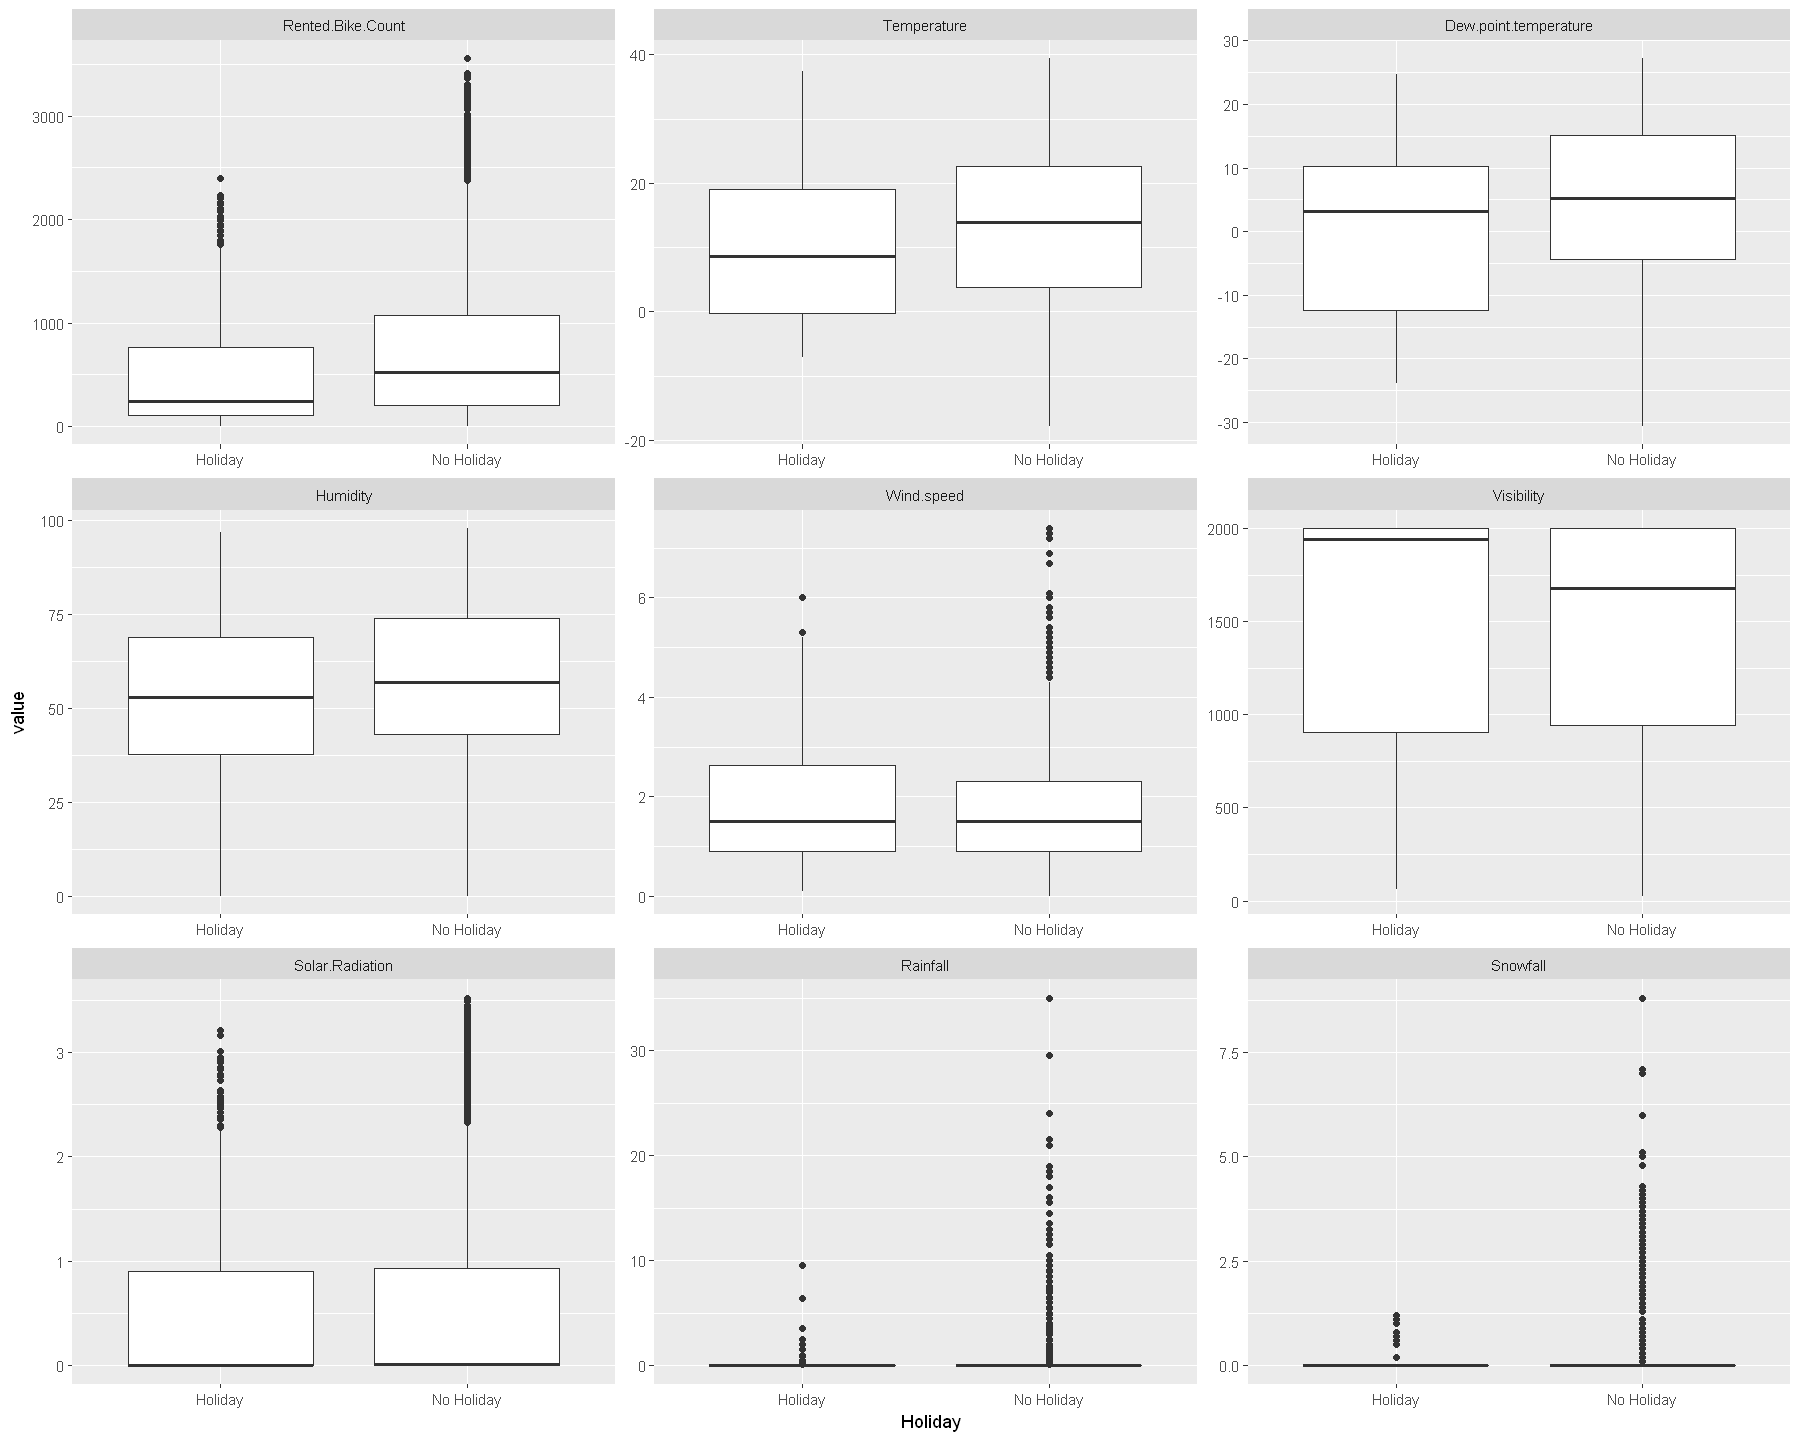

In [17]:
val <- 'Holiday'
dow <- sort(unique(df[df[,'Holiday'] == val, 'Date']))
dow <- paste(dow, collapse='\t')
cat('Holiday:', val, '\n')
cat(dow, '\n\n')

col_name <- c()
tmp <- melt(as.data.frame(df[,!names(df) %in% col_name]))
options(repr.plot.width=15, repr.plot.height=12)

ggplot(tmp, aes(x=Holiday,y=value)) +
    facet_wrap(~variable, scales="free") +
    geom_boxplot() +
    scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

- As printed, `Holiday` means it is public holiday, so christmas or particular days in a year
- As assumed, `Temperature`, `Dew.point.temperature`, `Humidity`, `Wind.speed`, `Visibility`, `Solar.Radiation`, `Rainfall`, `Snowfall` do not have any relationship with `Holiday`
- `Rented.Bike.Count` seems to be lower for `Holiday` than `No Holiday`, but this needs further exploration. This is going to be discussed at later section

### 3.13 Summary of EDA

Individual variables:
- `Rented.Bike.Count`
    - Target variable; dependent variable; value range between 0 and 3556; median, mean and Q3 are 504.5, 704.6 and 1065.2 whereas maximum is 3556, so there would be outliers at around maximum values
    - Outliers at the maximum value and have positive skews
    - `log10` of `Rented.Bike.Count` is negatively skewed rather than normally distributed but still better than orginal distribution
    - `sqrt` of `Rented.Bike.Count` is normally distributed, but still is not normally distributed(bi-modal).
    - `Rented.Bike.Count` had negative correlation to `Humidity`, `Rainfall` and `Snowfall` while positive correlation to other variables
- `Date`
    - Combination of year, month and day; the total number is 365, same as the total number of day per year
- `Year`
    - Year data; either 2017 or 2018
- `Month.Day`
    - Combination of month and day; the total number is 365, same as the total number of day per year
- `Month`
    - Month data; between 1 to 12
- `Day`
    - Day data; between 1 to 31
- `Hour`
    - Hour data; between 0 to 23
- `Seasons`
    - Seasonal data; there are `Spring`, `Summer`, `Autumn`, `Winter`
    - As expected, each `Seasons` has similar number of data points
    - `Seasons` and months are, `Spring` (03 to 05), `Summer` (06 to 08), `Autumn` (09 to 11) and `Winter` (12 to 02)
- `Day.of.Week`
    - Day of week data; there are `Monday` to `Sunday`
    - As expected, each `Day.of.Week` has similar number of data points
- `Holiday`
    - Indicates whether it is holiday or not; either `Holiday` or `No Holiday`
    - There are much more `No Holiday` than `Holiday`
    - `Holiday` means public holiday, so christmas or particular days in a year
    - `Temperature`, `Dew.point.temperature`, `Humidity`, `Wind.speed`, `Visibility`, `Solar.Radiation`, `Rainfall`, `Snowfall` do not have any relationship with `Holiday`
- `Weekend`
    - Indicates whether it is weekend or not; either `Yes` or `No`
- `Functioning.Day`
    - Indicates whether the day is functioning day or not; either `Yes` or `No`
    - There are much more `Yes` for `Functioning.Day` than `No`
    - Only 0 `Rented.Bike.Count` exists if `Functioning.Day` is `No`
    - `Wind.speed`, `Rainfall`, `Snowfall` seem to have more upper outliers for `Yes` of `Functioning.Day`, but it should be opposite because it makes more sense to have rougher weather for `No` of `Functioning.Day`
    - Hence, there seems to be no pattern between `Yes` and `No` in `Functioning.Day`
- `Temperature`
    - Temperature data; value range between -17.8 and 39.4 with 12.88 mean and 13.7 median
    - No outliers and normally distributed
    - Peak on August and during the winter, it reach minimum, which is around 0 Celcius
    - The plots of `Temperature` across different months appear to be the same, only scale is different
    - Maximum peak between 14 or 16 `Hour`
    - Maximum between 7 to 8 `Month` (late summer) and minimum between 12 to 2 `Month` (winter)
- `Dew.point.temperature`
    - Dewpoint temperature data; value range between -30.6 and 27.2 with 4.074 mean and 5.1 median. It is the temperature that air must be cooled for producing condensation (dew). It is a measure of how much moisture is in the air
    - No outliers and is slightly negatively skewed
    - Peak on August and during the winter, it reach minimum, which is around -10 Celcius
    - The plots of `Dew.point.temperature` across different months appear to be the same, only scale is different
    - Constant across different `Hour`, but decreases slightly between 8 to 18 `Hour`
    - Maximum between 7 to 8 `Month` (late summer) and minimum between 12 to 2 `Month` (winter)
- `Humidity`
    - Humidity data; value range between 0 and 98 with 58.23 mean and 57 median
    - No outliers and normally distributed
    - The plots of `Humidity` across different months appear to be the same, only scale is different
    - Minimum peak between 14 or 16 `Hour`
    - Maximum between 7 to 8 `Month` (late summer) and minimum between 12 to 2 `Month` (winter)
- `Wind.speed`
    - Wind speed data; value range between 0 and 7.4 with 1.725 mean and 1.5 median; mostly around 1.5; outliers would be around maximum values
    - Outliers at the maximum value and have positive skews
    - `log10` of `Wind.speed` appears to be normally distributed
    - `sqrt` of `Wind.speed` appears to be normally distributed, but better than `log10`
    - Seems constant across different months
- `Visibility`
    - Visibility data; value range between 27 and 2000 with 1437 mean and 1698 median; mostly 2000 and this means the day is well visible
    - No outliers and is largely negatively skewed, which indicates that there are more number of data points with high visibility
    - A lot of `Visibility` appears to be maximum between 8 to 10 `Month` (late summer to early autumn)
    - `log10` of `Visibility` is still left skewed but still better than un-transformated distribution on `Visibility`, which was highly left skewed.
- `Solar.Radiation`
    - Solar radiation data; value range between 0 and 3.52 with 0.5691 mean and 0.01 median; mostly around 0; outliers would be around maximum values
    - Outliers at the maximum value and has large positive skews
    - As assumed, `Solar.Radiation` is maximum when summer and minimum when winter
- `Rainfall`
    - Rainfall data; value range between 0 and 35 with 0.1487 mean and 0 median; mostly around 0; outliers would be around maximum values
    - Outliers at the maximum value extremely a lot and have large positive skews.
    - `Rainfall` seems to be arbitrary, but lesser between 11 to 2 `Month` (late autumn to winter), and this is when `Snowfall` appears
- `Snowfall`
    - Snowfall data; value range between 0 and 8.8 with 0.07507 mean and 0 median; mostly around 0; outliers would be around maximum values
    - Outliers at the maximum value extremely a lot and have large positive skews
    - `Snowfall` appears between 11 to 2 `Month` (late autumn to winter)

`Rented.Bike.Count` and `Tempreature`:
- All the variables seem to be correlated with `Rented.Bike.Count`, but `Temperature` seems to be the most correlated variable
- `Rented.Bike.Count` decreases when `Tempreature` is either too cold (winter) or hot (summer), so they appear to have non-linear relationship
    - Daily `Rented.Bike.Count` is small when the daily `Tempreature` is around 0 Celcius, but it increases as daily `Tempreature` increases
    - Around the peak daily `Tempreature`, daily `Rented.Bike.Count` drops and rise back
    - After that, daily `Rented.Bike.Count` decreases along with daily `Tempreature`
- We can make assumption that `Month` or `Seasons` does not influence `Rented.Bike.Count`, but `Tempreature` caused by `Month` or `Seasons` influences `Rented.Bike.Count`:
    - `Rented.Bike.Count` decreases a lot between 12 to 2 `Month` (winter) and between 7 to 8 `Month` (late summer)

`Rented.Bike.Count` by `Hour` and `Month`:
- All the months have the peak of average `Rented.Bike.Count`, which is 8 and 18 `Hour`
- `Winter` has the same average `Rented.Bike.Count` at 8 and 18 `Hour` whereas other seasons have higher peak at 18 `Hour` than 8 `Hour`
- `Winter` appears to have quite flat plot whereas other seasons fluxtuate a lot
- This would be because people do not want to go out at night time during winter as the it is too cold to go out
- `Summer` appears to have the average `Rented.Bike.Count` decaying not as rapid as `Spring` and `Autumn`
- This would be because people tend to stay outside at night time longer during summer as it is cooler at night time than day time

`Rented.Bike.Count` by `Hour`, `Weekend` and `Holiday`:
- `No Weekend` tend to have two spikes at 8 and 18 `Hour` whereas `Weekend` are more like smoothened polynomial curve
- Interestingly, `Holiday` follows similarly to `Weekend` and `No Holiday` does to `No Weekend`
- The average `Rented.Bike.Count` appears to be less for `Holiday` than `Weekend` in general
- This tells us that people prefer renting bikes less on holiday than weekend
- The average `Rented.Bike.Count` appears to have higher peak (8 and 18 `Hour`) on `No Weekend` than `No Holiday`, but other hours seem to be similar

`Rented.Bike.Count` by `Rainfall` and `Snowfall`:
- `Rented.Bike.Count` decreases little when there is `Rainfall`, and a lot when `Rainfall` is heavy, more than 1 mm
- `Rented.Bike.Count` appears to decrease a lot even if there is little `Snowfall`, but this is not fully accurate as it is generated with all `Month`
- As `Snowfall` occurs only between 11 to 2 `Month`, to see the influence of `Snowfall`, it is better to create density plot using only `Month` between 11 to 2, which is third row
- According to the last plot that we can compare Snowfall > 0 cm and Snowfall > 1 cm for 01, 02, 11, 12 Month, `Rented.Bike.Count` decreases a lot when there is `Snowfall`, but interestingly, when `Snowfall` is heavy, more than 1 cm, `Rented.Bike.Count` increases slightly

`Temperature`, `Humidity` and `Dew.point.temperature`:
- `Dew.point.temperature` has very high correlation with `Temperature`, 0.91, and with `Humidity`, 0.54
- This makes sense as `Dew.point.temperature` indicates how much moisture is in the air
- However, maximum peak for `Temperature` and minimum peak for `Humidity` are between 14 or 16 `Hour`, but `Dew.point.temperature` does not change across different `Hour`
- Maximum peak for `Temperature`, `Humidity` and `Dew.point.temperature` are during `Summer`
- Daily `Dew.point.temperature` seems highly related to the daily `Temperature`, where it is usually 5 to 10 Celcius lower than daily `Temperature`, so they have high correlation
- `Temperature`, `Dew.point.temperature` and `Humidity` are maximum between 7 to 8 `Month` (late summer) and minimum between 12 to 2 `Month` (winter)

`Temperature`, `Solar.Radiation` and `Rainfall`:
- Daily `Solar.Radiation` seems highly related to daily `Temperature`, but it seems like it is shifted from daily `Temperature`
- Daily `Solar.Radiation` starts to increase from February whereas daily `Temperature` starts to increase from March
- The peak of daily `Solar.Radiation` seems to be June whereas daily `Temperature` is August
- Those days with high daily `Rainfall` decreases daily `Solar.Radiation`, especially between mid May and September. However, daily `Rainfall` decreases daily `Solar.Radiation`, but it is not the only reason for a decrease in daily `Solar.Radiation`, so correlation between them is not high

Other variables:
- `Temperature` is also negatively correlated to `Snowfall` as 1) `Snowfall` occurs only during winter and 2) when `Snowfall` occurs, it will generally get colder
- Both `Dew.point.temperature` and `Humidity` are negatively correlated to `Wind.speed` and `Visibility` as lesser the wind or visibility, we can say the air is generally more moisture, such as fog
- `Humidity` is also negatively correlated to `Solar.Radiation` and positively correlated to `Rainfall` since they determine `Humidity` in general
- Interestingly, `Wind.speed` is positively correlated to `Visibility` and `Solar.Radiation`. This might be because it is negatively correlated to the variables that are negatively correlated to `Visibility` and `Solar.Radiation`, such as `Humidity`

How different variables vary by Hour:
- Between morning until afternoon, `Tempreature`, `Wind.speed`, `Solar.Radiation` increase whereas `Humidity` decreases
- Between afternoon until night, `Tempreature`, `Wind.speed`, `Solar.Radiation` decrease whereas `Humidity` increases
- The behaviour of `Tempreature`, `Solar.Radiation` and `Humidity` is obvious as that is when the sun is up
- Interestingly, `Wind.speed` fluxtuates during the day time
- `Visibility` decreases midnight and morning and increases until afternoon
- `Rainfall`, `Snowfall`, `Dew.point.tempreature` seem to have no correlationship between hour of the day

### 3.14 Conclusion after EDA
Firstly, definitely exclude:
- `Year`: Our dataset is only 2017 and 2018 and even if we have before 2017 or after 2018, including `Year` will only cause inaccuracy as it is noise in our model
- `Day`: `Day` is not related in any way to `Rented.Bike.Count`

Secondly, we can argue to exclude
- `Date` and `Month.Day`: Our dataset contains data for a year. Each training and testing dataset contain 365 days. So using either of them might be seen as appropriate since it can be used as an indicator of a specific day of year. However, if we do, we cannot predict unseen `Date` or `Month.Day`, such as `2017-01-01` or `02-29`. Although our training dataset contains all the day of year, in order to generalize the model, these two attributes are excluded.

There are four types of variables that overlap, so in order to make things easier with small compromises, we can make assumptions:
- `Month` can be used to capture information of `Seasons`
    - However, from Random Forest, `Seasons` is used instead of `Month` due to the training time and overfitting
- `Day.of.Week` can be used to capture information of `Weekend`
    - However, from Random Forest, `Weekend` is used instead of `Day.of.Week` due to the training time and overfitting
- `Rainfall` can be used to capture information of `Rainfall.Avg`, `Rainfall.Bool.0`, `Rainfall.Bool.1`
- `Snowfall` can be used to capture information of `Snowfall.Avg`, `Snowfall.Bool.0`, `Snowfall.Bool.1`, `Snowfall.Bool.0.Month`, `Snowfall.Bool.1.Month`

Other variables that should be included are:
- `Hour`, `Holiday`, `Functioning.Day`, `Temperature`, `Dew.point.temperature`, `Humidity`, `Wind.speed`, `Solar.Radiation`

Transformation: `sqrt(Wind.speed)`, `log(Visibility)`, `sqrt(Rented.Bike.Count)` or `log(Rented.Bike.Count+1)`

- Transformation of dependent variable has to be applied separately while independent variables can be applied at the same time

Interations between independent variables: `Temperature:Snowfall`, `Dew.point.temperature:Wind.speed`, `Humidity:Wind.speed`, `Dew.point.temperature:Visibility`, `Humidity:Visibility`, `Humidity:Solar.Radiation`, `Humidity:Rainfall`, `Dew.point.temperature:Temperature`, `Dew.point.temperature:Humidity`, `Solar.Radiation:Temperature`, `Solar.Radiation:Rainfall`
- We can expect the correlation between `Wind.speed` and `Visibility` can be represented by `Humidity:Wind.speed` and `Humidity:Visibility`
- We can expect the correlation between `Wind.speed` and `Solar.Radiation` can be represented by `Humidity:Wind.speed` and `Humidity:Solar.Radiation`
- `Temperature:Hour`, `Wind.speed:Hour`, `Solar.Radiation:Hour`, `Humidity:Hour`, `Visibility:Hour`, `Dew.point.temperature:Month`, `Temperature:Month`, `Humidity:Month`

## 4. Model Building

### Reading Dataset
- Create function for reading the dataset and preprocess them according to EDA
- Read both training and testing data

In [18]:
# preprocess dataset 1
preprocessing_dataset_1 <- function(df_in) {
    # create columns
    df_in$Date <- strptime(as.character(df_in$Date), "%d/%m/%y")
    df_in$Day.of.Week <- weekdays(df_in$Date)
    df_in$Month <- strftime(df_in$Date, format = "%m")

    # change data type
    col_name <- c('Month', 'Day.of.Week', 'Hour')
    df_in[col_name] <- lapply(df_in[col_name], factor)

    # change order of data
    df_in <- df_in[order(df_in[,'Date'], df_in[,'Hour']),]
    rownames(df_in) <- NULL
    col_name <- c('Rented.Bike.Count',
                  'Month', 'Hour', 'Day.of.Week', 'Holiday', 'Functioning.Day', 
                  'Temperature', 'Dew.point.temperature', 'Humidity', 'Wind.speed',
                  'Visibility', 'Solar.Radiation', 'Rainfall', 'Snowfall')
    df_in <- df_in[,col_name]
    return(df_in)
}

# training dataset
# read datasets
df_trn <- read.csv('train.csv')
df_trn <- preprocessing_dataset_1(df_trn)

# testing dataset
# read datasets
df_tst <- read.csv('test.csv')
df_tst <- preprocessing_dataset_1(df_tst)

In [19]:
# MSE calculation function 
mse_cal <- function(model, test_data) {
    pred.model <- predict(model, test_data)
    mse.model = mean((pred.model - log(test_data$Rented.Bike.Count + 1))^2)
    return(mse.model)
    }

### 4.1 Linear Regression

To evaluate linear regression model, we will use:

1. Multiple R-squared:
    Proportion of variability in Target(Rented.Bike.Count) that can be explained using all the predictors is told by R-squared value. Its value range from 0 to 1, and larger the value of R-squared means better our model is fitting the data.
    

2. Adjusted R-squared:
    It is more robust than Multiple R-squared because Multiple R-squared always increases if we add any new variable, wehereas Adjusted R-squared penalise the number of features in the model. Larger the value of R-squared means better our model is fitting the data.
    
    
3. p-value:
    Model p-value shows the predicative power of predictor variable, it is used to determine which feature/variable to keep in the model. Lower the value it have better it is.
    
    
4. F-statistic: 
    It gives evidence against null hypothesis. Greater the F-statistic, better it is.


5. Residual standard error:
    Quality of linear regression fit is given by it. It tells us how much target will deviate from the true regression line. It should be as low as possible.
    
We are going to check all the above defined values to elvaluate linear regression model and also we are going to to check mean squared error(mse) as well.

1. __Simple linear regression__

In [22]:
lm1 = lm(Rented.Bike.Count~., df_trn)
summary(lm1)


Call:
lm(formula = Rented.Bike.Count ~ ., data = df_trn)

Residuals:
     Min       1Q   Median       3Q      Max 
-1631.23  -211.70    -8.75   197.81  1512.04 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -351.65663   93.03338  -3.780 0.000158 ***
Month02                -64.60340   21.58811  -2.993 0.002776 ** 
Month03                 44.46950   24.98144   1.780 0.075103 .  
Month04                131.83391   28.63873   4.603 4.23e-06 ***
Month05                262.31379   33.23731   7.892 3.43e-15 ***
Month06                383.83510   38.01244  10.098  < 2e-16 ***
Month07                 -7.38498   44.00276  -0.168 0.866722    
Month08               -146.43727   45.60805  -3.211 0.001330 ** 
Month09                196.14031   38.50577   5.094 3.60e-07 ***
Month10                358.29071   30.02266  11.934  < 2e-16 ***
Month11                283.46787   24.77690  11.441  < 2e-16 ***
Month12                 66.17712   20.96570

- Residual standard error: 354.2 , Multiple R-squared:  0.7013,	Adjusted R-squared:  0.6992, F-statistic: 326.7
- `Day.of.WeekSaturday` and `Day.of.WeekSunday` have lower p-value (more significant) than any other `Day.of.Week` as they are weekends
    - This would be because the model is fitted to data on weekdays, so weekends factors influence the output (more significant) more than weekdays factors
- There are some factorized values with high p-values (less significant)
- It appears to be that most of variables are significant apart from `Wind.speed`, other than factorized values
    - This makes sense as it is one of the variables with the lowest correlation to `Rented.Bike.Count`

2. __Linear Model with transformed Independent Variables__

    As linear model finds difficult to map non-linearity, we introduce transformed independent variables and interactions between independent variables

In [23]:
lm2 = lm(Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Visibility) , df_trn)

summary(lm2)


Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Visibility), 
    data = df_trn)

Residuals:
     Min       1Q   Median       3Q      Max 
-1627.85  -212.35    -7.91   197.67  1491.33 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -8.721e+02  1.819e+02  -4.794 1.67e-06 ***
Month02               -6.249e+01  2.157e+01  -2.897 0.003776 ** 
Month03                4.657e+01  2.496e+01   1.866 0.062106 .  
Month04                1.328e+02  2.864e+01   4.637 3.59e-06 ***
Month05                2.691e+02  3.324e+01   8.096 6.63e-16 ***
Month06                3.882e+02  3.799e+01  10.219  < 2e-16 ***
Month07               -1.024e+00  4.400e+01  -0.023 0.981441    
Month08               -1.363e+02  4.562e+01  -2.987 0.002830 ** 
Month09                2.054e+02  3.853e+01   5.332 1.00e-07 ***
Month10                3.643e+02  3.003e+01  12.129  < 2e-16 ***
Month11                2.870e+02  2.478e+01  11.579  < 2e-16 ***
M

- A little improvement in Multiple R-squared, F-statistic, Residual standard error and Adjusted R-squared

3. __Linear Model with transformed and interactions Independent Variables__

In [24]:
lm3 = lm(Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Visibility) + Temperature:Snowfall
                + Dew.point.temperature:Wind.speed + Humidity:Wind.speed
                + Dew.point.temperature:Visibility + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Temperature + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(lm3)


Call:
lm(formula = Rented.Bike.Count ~ . + sqrt(Wind.speed) + log(Visibility) + 
    Temperature:Snowfall + Dew.point.temperature:Wind.speed + 
    Humidity:Wind.speed + Dew.point.temperature:Visibility + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Temperature + Dew.point.temperature:Humidity + 
    Solar.Radiation:Temperature + Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-1418.7  -190.7   -16.8   180.6  1344.3 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.828e+03  2.141e+02  -8.542  < 2e-16 ***
Month02                           -5.682e+01  2.072e+01  -2.742 0.006129 ** 
Month03                            5.539e+01  2.489e+01   2.225 0.026123 *  
Month04                            2.021e+02  2.861e+01   7.065 1.76e-12 ***
Month05                            3.930e+02  3.320e+01  11.837  < 2e-16 ***

- Since Residual standard error: 329, Multiple R-squared:  0.7429,	Adjusted R-squared:  0.7405, F-statistic: 318.4 increases, these all got better after adding interactions between independent variables So interaction help to improve the performance of the linear regression, it appears to help the linear model to capture non-linearity

4. __Transformed, interactions Independent Variables and Transformed Dependent Variable Linear Model__
    - 1st trying __square root__ transformation of dependent variable, since __square root__ is producing normal distribution as discussed in EDA above.

In [25]:
lm4 = lm(sqrt(Rented.Bike.Count) ~ . + sqrt(Wind.speed) + log(Visibility) + Temperature:Snowfall
                + Dew.point.temperature:Wind.speed + Humidity:Wind.speed
                + Dew.point.temperature:Visibility + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Temperature + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(lm4)


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ . + sqrt(Wind.speed) + 
    log(Visibility) + Temperature:Snowfall + Dew.point.temperature:Wind.speed + 
    Humidity:Wind.speed + Dew.point.temperature:Visibility + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Temperature + Dew.point.temperature:Humidity + 
    Solar.Radiation:Temperature + Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-25.066  -3.078   0.096   3.338  29.088 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -2.029e+01  3.563e+00  -5.694 1.29e-08 ***
Month02                           -1.186e+00  3.450e-01  -3.438  0.00059 ***
Month03                            1.834e+00  4.144e-01   4.427 9.72e-06 ***
Month04                            3.874e+00  4.763e-01   8.135 4.85e-16 ***
Month05                            6.921e+00  5.528e-01  12.521  < 2e-

Huge improvement in all the model performance evaluation metrics after transforming dependent variable by square root.

- Now, lets try `log` transformation of dependent variable. Using `log(Rented.Bike.Count+1)` becuase `Rented.Bike.Count` have zero value as well and value of log(0) is infinity that is why added +1 inside log. 

In [26]:
lm5 = lm(log(Rented.Bike.Count+1) ~ . + sqrt(Wind.speed) + log(Visibility) + Temperature:Snowfall
                + Dew.point.temperature:Wind.speed + Humidity:Wind.speed
                + Dew.point.temperature:Visibility + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Temperature + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(lm5)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ . + sqrt(Wind.speed) + 
    log(Visibility) + Temperature:Snowfall + Dew.point.temperature:Wind.speed + 
    Humidity:Wind.speed + Dew.point.temperature:Visibility + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Temperature + Dew.point.temperature:Humidity + 
    Solar.Radiation:Temperature + Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7326 -0.2260  0.0376  0.3016  5.1490 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.568e-01  3.638e-01  -0.431  0.66638    
Month02                           -1.517e-01  3.522e-02  -4.308 1.67e-05 ***
Month03                            2.046e-01  4.231e-02   4.836 1.35e-06 ***
Month04                            2.874e-01  4.862e-02   5.911 3.57e-09 ***
Month05                            5.509e-01  5.643e-02   9.763  < 

We see in `log` transformation R-squared value is increase much more then `sqrt` transformation and also Residual standard error is highly reduced in `log` trnaformation as compared to `sqrt` transformation.

__Feature Selection__

Clearly, there are terms or varibales in the model which have high p-value. So, we need to remove statistically insignificant terms.
We can do it using many methods such as:

- Subset Selection. This approach involves identifying a subset of the p
predictors that we believe to be related to the response. We then fit
a model using least squares on the reduced set of variables. It can be done using forward subset selection, backward subset selection or hybrid subset selection methods

- Shrinkage. This approach involves fitting a model involving all p predictors.
However, the estimated coefficients are shrunken towards zero
relative to the least squares estimates. This shrinkage (also known as
regularization) has the effect of reducing variance. Depending on what
type of shrinkage is performed, some of the coefficients may be estimated
to be exactly zero. Hence, shrinkage methods can also perform
variable selection. It can be done using lasso or ridge regularisations.

- Dimension Reduction. This approach involves projecting the p predictors
into a M-dimensional subspace, where M < p. This is achieved
by computing M different linear combinations, or projections, of the
variables. Then these M projections are used as predictors to fit a
linear regression model by least squares.

But I will do it manually by checking the p-value of each variable, using anova function and using the information I get through Explonatory data analysis above section.

In [27]:
summary(lm5)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ . + sqrt(Wind.speed) + 
    log(Visibility) + Temperature:Snowfall + Dew.point.temperature:Wind.speed + 
    Humidity:Wind.speed + Dew.point.temperature:Visibility + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Temperature + Dew.point.temperature:Humidity + 
    Solar.Radiation:Temperature + Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7326 -0.2260  0.0376  0.3016  5.1490 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -1.568e-01  3.638e-01  -0.431  0.66638    
Month02                           -1.517e-01  3.522e-02  -4.308 1.67e-05 ***
Month03                            2.046e-01  4.231e-02   4.836 1.35e-06 ***
Month04                            2.874e-01  4.862e-02   5.911 3.57e-09 ***
Month05                            5.509e-01  5.643e-02   9.763  < 

If we check the p-values of all the features.

- `sqrt(Wind.speed)`, `log(Visibility)`, `Temperature:Snowfall` have big p-values. 1st we will remove them and then check our Adjusted R squared value

In [28]:
lm6 = lm(log(Rented.Bike.Count+1) ~ . + Dew.point.temperature:Wind.speed + Humidity:Wind.speed
                + Dew.point.temperature:Visibility + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Temperature + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(lm6)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ . + Dew.point.temperature:Wind.speed + 
    Humidity:Wind.speed + Dew.point.temperature:Visibility + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Temperature + Dew.point.temperature:Humidity + 
    Solar.Radiation:Temperature + Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7422 -0.2277  0.0390  0.3015  5.1573 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       -7.512e-02  1.817e-01  -0.413  0.67927    
Month02                           -1.478e-01  3.482e-02  -4.245 2.21e-05 ***
Month03                            2.045e-01  4.229e-02   4.835 1.36e-06 ***
Month04                            2.898e-01  4.856e-02   5.967 2.53e-09 ***
Month05                            5.509e-01  5.642e-02   9.764  < 2e-16 ***
Month06                            8.152e-01  6.415e-02

No reduction is Adjusted R-squared value, hence we were able to reduce the complexity of model without compromising the model fit.
- We cannot remove `Dew.point.temperature` even if we see it p-value is big becuase it is in an interaction term `Dew.point.temperature:Humidity` and its p-vlaue is extremly small
- We see `Dew.point.temperature:Visibility` and `Temperature:Dew.point.temperature` have big p-value, removing them.

In [29]:
lm7 = lm(log(Rented.Bike.Count+1) ~ . + Dew.point.temperature:Wind.speed + Humidity:Wind.speed
                + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(lm7)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ . + Dew.point.temperature:Wind.speed + 
    Humidity:Wind.speed + Humidity:Visibility + Humidity:Solar.Radiation + 
    Humidity:Rainfall + Dew.point.temperature:Humidity + Solar.Radiation:Temperature + 
    Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7623 -0.2295  0.0389  0.3025  5.1087 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -1.496e-01  1.734e-01  -0.863  0.38814    
Month02                          -1.371e-01  3.456e-02  -3.967 7.34e-05 ***
Month03                           2.350e-01  4.044e-02   5.811 6.50e-09 ***
Month04                           3.263e-01  4.629e-02   7.049 1.98e-12 ***
Month05                           5.804e-01  5.501e-02  10.551  < 2e-16 ***
Month06                           8.307e-01  6.300e-02  13.186  < 2e-16 ***
Month07                           4.247e-01  7.408e-02   5.73

Extremly small reduction is Adjusted R-squared value, hence we were able to reduce the complexity of model without compromising the model fit.

According to p-value next, I can remove `Snowfall` and `Dew.point.temperature:Wind.speed`

In [30]:
lm8 = lm(log(Rented.Bike.Count+1) ~ . - Snowfall + Humidity:Wind.speed
                + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(lm8)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ . - Snowfall + Humidity:Wind.speed + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Humidity + Solar.Radiation:Temperature + 
    Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7735 -0.2340  0.0415  0.3015  5.1068 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -4.704e-02  1.714e-01  -0.274 0.783784    
Month02                        -1.346e-01  3.458e-02  -3.894 9.95e-05 ***
Month03                         2.443e-01  4.035e-02   6.054 1.49e-09 ***
Month04                         3.281e-01  4.628e-02   7.088 1.49e-12 ***
Month05                         5.759e-01  5.505e-02  10.462  < 2e-16 ***
Month06                         8.162e-01  6.298e-02  12.959  < 2e-16 ***
Month07                         3.985e-01  7.395e-02   5.388 7.35e-08 ***
Month08                  

I think now all the features are statistically significant or unavoidable. So this will be our final model.

# Final Model and its Mean Square error 

In [31]:
final.model = lm(log(Rented.Bike.Count+1) ~ . - Snowfall + Humidity:Wind.speed
                + Humidity:Visibility
                + Humidity:Solar.Radiation + Humidity:Rainfall
                + Dew.point.temperature:Humidity
                + Solar.Radiation:Temperature + Solar.Radiation:Rainfall, df_trn)

summary(final.model)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ . - Snowfall + Humidity:Wind.speed + 
    Humidity:Visibility + Humidity:Solar.Radiation + Humidity:Rainfall + 
    Dew.point.temperature:Humidity + Solar.Radiation:Temperature + 
    Solar.Radiation:Rainfall, data = df_trn)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7735 -0.2340  0.0415  0.3015  5.1068 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -4.704e-02  1.714e-01  -0.274 0.783784    
Month02                        -1.346e-01  3.458e-02  -3.894 9.95e-05 ***
Month03                         2.443e-01  4.035e-02   6.054 1.49e-09 ***
Month04                         3.281e-01  4.628e-02   7.088 1.49e-12 ***
Month05                         5.759e-01  5.505e-02  10.462  < 2e-16 ***
Month06                         8.162e-01  6.298e-02  12.959  < 2e-16 ***
Month07                         3.985e-01  7.395e-02   5.388 7.35e-08 ***
Month08                  

### Mean Square error

In [32]:
mse = mse_cal(final.model, df_tst)
cat("Mean Squared error of final model: ", mse)

Mean Squared error of final model:  0.2808379